# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

/usr/local/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


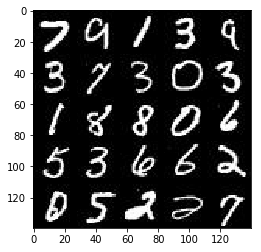

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

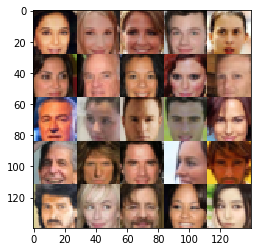

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_input = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels))
    z = tf.placeholder(tf.float32, shape=(None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    
    return real_input, z, learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    keep_prob=0.5
    
    with tf.variable_scope("discriminator", reuse=reuse):
        conv1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        
        conv1 = tf.maximum(alpha * conv1, conv1)
        conv1=tf.nn.dropout(conv1,keep_prob)
        
        conv2 = tf.layers.conv2d(conv1, 128, 5, strides=2, padding='same')
        conv2 = tf.layers.batch_normalization(conv2,  training=True)
        conv2 = tf.maximum(alpha * conv2, conv2)
        conv2=tf.nn.dropout(conv2,keep_prob)
        
        conv3 = tf.layers.conv2d(conv2, 256, 5, strides=2, padding='same')
        conv3 = tf.layers.batch_normalization(conv3,  training=True)
        conv3 = tf.maximum(alpha * conv3, conv3)
        conv3=tf.nn.dropout(conv3,keep_prob)
        

        #flat  = tf.reshape(conv3, (-1, 4*4*256))
        flat=tf.contrib.layers.flatten(conv3)
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.1
    keep_prob=0.5
        
    with tf.variable_scope("generator", reuse=not is_train):
        x = tf.layers.dense(z, 7*7*512)
        x = tf.reshape(x, (-1, 7, 7, 512))
        x = tf.layers.batch_normalization(x, training=is_train)
       
        x = tf.maximum(alpha * x, x)
        x=tf.nn.dropout(x,keep_prob)
        
        # 7x7x512
        
        conv1 = tf.layers.conv2d_transpose(x, 256, 5, strides=1, padding="same")
        conv1 = tf.layers.batch_normalization(conv1, training=is_train)
        
        conv1 = tf.maximum(alpha * conv1, conv1)
        conv1=tf.nn.dropout(conv1,keep_prob)
        # 14x14x256
        
        conv2 = tf.layers.conv2d_transpose(conv1, 128, 5, strides=2, padding="same")
        conv2 = tf.layers.batch_normalization(conv2, training=is_train)
        
        conv2 = tf.maximum(alpha * conv2, conv2)
        conv2=tf.nn.dropout(conv2,keep_prob)
        # 28x28x128
        
        
       
        
        logits = tf.layers.conv2d_transpose(conv2, out_channel_dim, 5, strides=2, padding="same")
        out = tf.tanh(logits)
    
    return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)*0.9))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_real)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): 
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 50
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                batch_images *= 2
                # TODO: Train Model
                steps += 1
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 1.1540... Generator Loss: 1.2978
Epoch 0/2... Discriminator Loss: 1.5319... Generator Loss: 1.1719
Epoch 0/2... Discriminator Loss: 1.7236... Generator Loss: 1.1322
Epoch 0/2... Discriminator Loss: 1.4047... Generator Loss: 1.5545


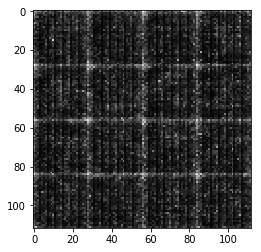

Epoch 0/2... Discriminator Loss: 1.4190... Generator Loss: 1.3767
Epoch 0/2... Discriminator Loss: 1.3347... Generator Loss: 1.4417
Epoch 0/2... Discriminator Loss: 1.4062... Generator Loss: 1.3768
Epoch 0/2... Discriminator Loss: 1.9326... Generator Loss: 0.6908
Epoch 0/2... Discriminator Loss: 0.8467... Generator Loss: 2.4803


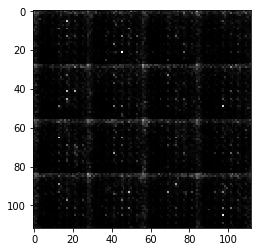

Epoch 0/2... Discriminator Loss: 1.8473... Generator Loss: 1.4755
Epoch 0/2... Discriminator Loss: 1.1024... Generator Loss: 1.0769
Epoch 0/2... Discriminator Loss: 1.4870... Generator Loss: 1.6986
Epoch 0/2... Discriminator Loss: 1.3125... Generator Loss: 2.0784
Epoch 0/2... Discriminator Loss: 1.9960... Generator Loss: 1.2604


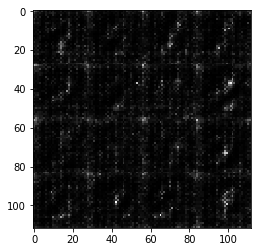

Epoch 0/2... Discriminator Loss: 1.5602... Generator Loss: 1.2543
Epoch 0/2... Discriminator Loss: 1.3433... Generator Loss: 1.1394
Epoch 0/2... Discriminator Loss: 1.4450... Generator Loss: 1.5544
Epoch 0/2... Discriminator Loss: 1.3323... Generator Loss: 1.5348
Epoch 0/2... Discriminator Loss: 1.3308... Generator Loss: 1.5842


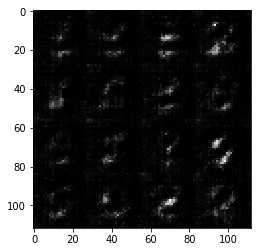

Epoch 0/2... Discriminator Loss: 1.8637... Generator Loss: 1.0812
Epoch 0/2... Discriminator Loss: 1.2525... Generator Loss: 1.4870
Epoch 0/2... Discriminator Loss: 1.6631... Generator Loss: 0.9980
Epoch 0/2... Discriminator Loss: 1.4170... Generator Loss: 1.5280
Epoch 0/2... Discriminator Loss: 1.4175... Generator Loss: 1.3529


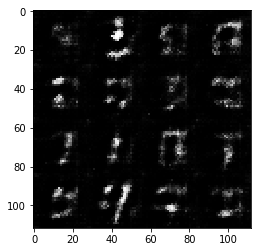

Epoch 0/2... Discriminator Loss: 1.7460... Generator Loss: 1.0897
Epoch 0/2... Discriminator Loss: 1.8408... Generator Loss: 0.8372
Epoch 0/2... Discriminator Loss: 1.5843... Generator Loss: 0.8361
Epoch 0/2... Discriminator Loss: 1.1312... Generator Loss: 1.5224
Epoch 0/2... Discriminator Loss: 1.2931... Generator Loss: 1.1219


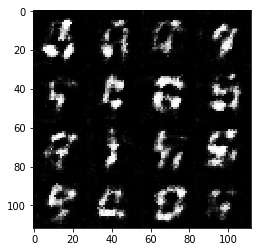

Epoch 0/2... Discriminator Loss: 1.3778... Generator Loss: 1.0132
Epoch 0/2... Discriminator Loss: 1.4410... Generator Loss: 1.1834
Epoch 0/2... Discriminator Loss: 1.3262... Generator Loss: 1.3930
Epoch 0/2... Discriminator Loss: 1.5254... Generator Loss: 1.0827
Epoch 0/2... Discriminator Loss: 1.3175... Generator Loss: 1.1127


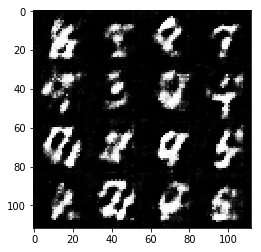

Epoch 0/2... Discriminator Loss: 1.4873... Generator Loss: 1.3217
Epoch 0/2... Discriminator Loss: 1.3591... Generator Loss: 1.0818
Epoch 0/2... Discriminator Loss: 1.5830... Generator Loss: 0.9252
Epoch 0/2... Discriminator Loss: 1.3015... Generator Loss: 1.2778
Epoch 0/2... Discriminator Loss: 1.5192... Generator Loss: 0.9500


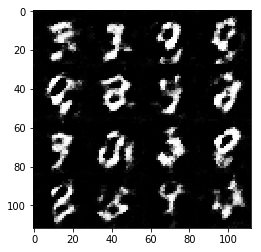

Epoch 0/2... Discriminator Loss: 1.4458... Generator Loss: 1.3293
Epoch 0/2... Discriminator Loss: 1.3394... Generator Loss: 1.3008
Epoch 0/2... Discriminator Loss: 1.3223... Generator Loss: 1.1135
Epoch 0/2... Discriminator Loss: 1.6011... Generator Loss: 1.0193
Epoch 0/2... Discriminator Loss: 1.4295... Generator Loss: 1.1529


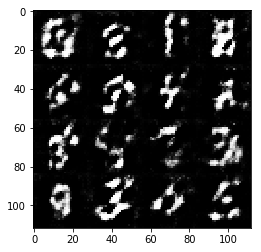

Epoch 0/2... Discriminator Loss: 1.5789... Generator Loss: 1.2399
Epoch 0/2... Discriminator Loss: 1.2461... Generator Loss: 1.1887
Epoch 0/2... Discriminator Loss: 1.2685... Generator Loss: 0.9235
Epoch 0/2... Discriminator Loss: 1.4136... Generator Loss: 1.3047
Epoch 0/2... Discriminator Loss: 1.2405... Generator Loss: 1.0957


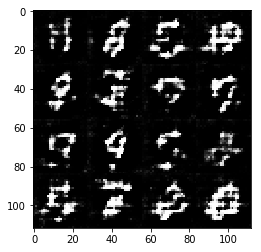

Epoch 0/2... Discriminator Loss: 1.3759... Generator Loss: 1.0660
Epoch 0/2... Discriminator Loss: 1.1938... Generator Loss: 1.0640
Epoch 0/2... Discriminator Loss: 1.5175... Generator Loss: 1.1161
Epoch 0/2... Discriminator Loss: 1.3922... Generator Loss: 1.0345
Epoch 0/2... Discriminator Loss: 1.3474... Generator Loss: 1.4252


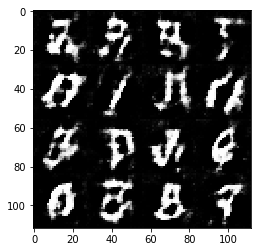

Epoch 0/2... Discriminator Loss: 1.3325... Generator Loss: 0.8691
Epoch 0/2... Discriminator Loss: 1.3888... Generator Loss: 0.9056
Epoch 0/2... Discriminator Loss: 1.4364... Generator Loss: 1.2787
Epoch 0/2... Discriminator Loss: 1.1733... Generator Loss: 1.0161
Epoch 0/2... Discriminator Loss: 1.0466... Generator Loss: 1.2963


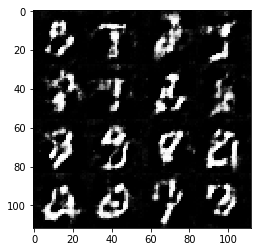

Epoch 0/2... Discriminator Loss: 1.3105... Generator Loss: 1.0793
Epoch 0/2... Discriminator Loss: 1.5586... Generator Loss: 0.9190
Epoch 0/2... Discriminator Loss: 1.2921... Generator Loss: 1.0624
Epoch 0/2... Discriminator Loss: 1.4986... Generator Loss: 1.1502
Epoch 0/2... Discriminator Loss: 1.2031... Generator Loss: 1.1358


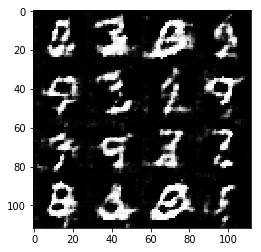

Epoch 0/2... Discriminator Loss: 1.1124... Generator Loss: 1.1576
Epoch 0/2... Discriminator Loss: 1.5298... Generator Loss: 1.1164
Epoch 0/2... Discriminator Loss: 1.5112... Generator Loss: 0.8426
Epoch 0/2... Discriminator Loss: 1.1990... Generator Loss: 1.1222
Epoch 0/2... Discriminator Loss: 1.3477... Generator Loss: 1.3168


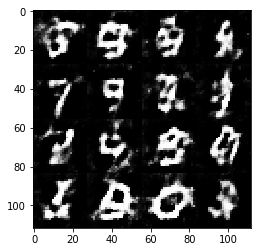

Epoch 0/2... Discriminator Loss: 1.3796... Generator Loss: 1.3905
Epoch 0/2... Discriminator Loss: 1.3299... Generator Loss: 1.4122
Epoch 0/2... Discriminator Loss: 1.3724... Generator Loss: 0.9984
Epoch 0/2... Discriminator Loss: 1.4140... Generator Loss: 0.8566
Epoch 0/2... Discriminator Loss: 1.4019... Generator Loss: 1.1358


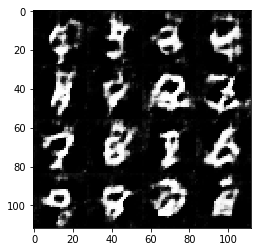

Epoch 0/2... Discriminator Loss: 1.4141... Generator Loss: 1.0577
Epoch 0/2... Discriminator Loss: 1.2579... Generator Loss: 1.2140
Epoch 0/2... Discriminator Loss: 1.2243... Generator Loss: 1.2714
Epoch 0/2... Discriminator Loss: 1.3411... Generator Loss: 1.5472
Epoch 0/2... Discriminator Loss: 1.3376... Generator Loss: 0.8791


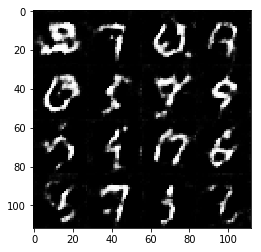

Epoch 0/2... Discriminator Loss: 1.3828... Generator Loss: 0.9588
Epoch 0/2... Discriminator Loss: 1.2819... Generator Loss: 0.8151
Epoch 0/2... Discriminator Loss: 1.2612... Generator Loss: 1.1919
Epoch 0/2... Discriminator Loss: 1.4521... Generator Loss: 0.9273
Epoch 0/2... Discriminator Loss: 1.2781... Generator Loss: 0.8872


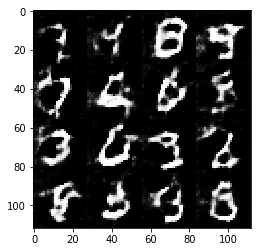

Epoch 0/2... Discriminator Loss: 1.2946... Generator Loss: 0.9789
Epoch 0/2... Discriminator Loss: 1.5139... Generator Loss: 1.0396
Epoch 0/2... Discriminator Loss: 1.4280... Generator Loss: 1.1927
Epoch 0/2... Discriminator Loss: 1.4619... Generator Loss: 0.8808
Epoch 0/2... Discriminator Loss: 1.2918... Generator Loss: 0.9670


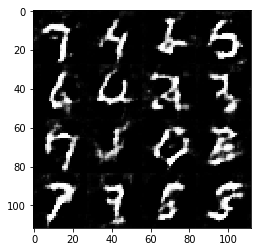

Epoch 0/2... Discriminator Loss: 1.2302... Generator Loss: 1.1076
Epoch 0/2... Discriminator Loss: 1.2953... Generator Loss: 1.0944
Epoch 0/2... Discriminator Loss: 1.4275... Generator Loss: 0.7020
Epoch 0/2... Discriminator Loss: 1.2771... Generator Loss: 0.7170
Epoch 0/2... Discriminator Loss: 1.1715... Generator Loss: 0.8358


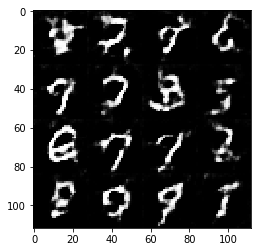

Epoch 0/2... Discriminator Loss: 1.3998... Generator Loss: 1.2056
Epoch 0/2... Discriminator Loss: 1.4915... Generator Loss: 1.2270
Epoch 0/2... Discriminator Loss: 1.3292... Generator Loss: 1.2890
Epoch 0/2... Discriminator Loss: 1.4894... Generator Loss: 1.1934
Epoch 0/2... Discriminator Loss: 1.3633... Generator Loss: 0.9978


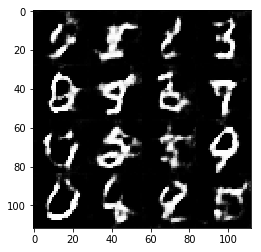

Epoch 0/2... Discriminator Loss: 1.3893... Generator Loss: 0.9865
Epoch 0/2... Discriminator Loss: 1.2490... Generator Loss: 1.1520
Epoch 0/2... Discriminator Loss: 1.2897... Generator Loss: 0.8966
Epoch 0/2... Discriminator Loss: 1.2492... Generator Loss: 1.3021
Epoch 0/2... Discriminator Loss: 1.2457... Generator Loss: 1.0555


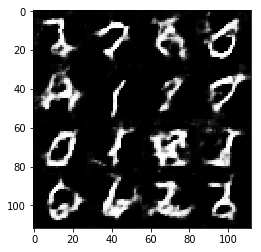

Epoch 0/2... Discriminator Loss: 1.3518... Generator Loss: 0.9260
Epoch 0/2... Discriminator Loss: 1.4880... Generator Loss: 1.0907
Epoch 0/2... Discriminator Loss: 1.2003... Generator Loss: 1.1121
Epoch 0/2... Discriminator Loss: 1.2742... Generator Loss: 1.1243
Epoch 0/2... Discriminator Loss: 1.4069... Generator Loss: 1.1809


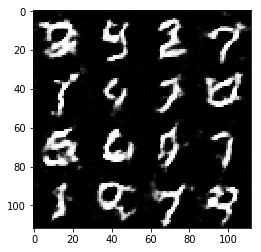

Epoch 0/2... Discriminator Loss: 1.5850... Generator Loss: 0.8279
Epoch 0/2... Discriminator Loss: 1.3057... Generator Loss: 0.9089
Epoch 0/2... Discriminator Loss: 1.5299... Generator Loss: 0.9046
Epoch 0/2... Discriminator Loss: 1.3169... Generator Loss: 0.9093
Epoch 0/2... Discriminator Loss: 1.2225... Generator Loss: 0.9871


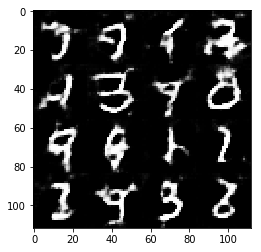

Epoch 0/2... Discriminator Loss: 1.4961... Generator Loss: 1.0463
Epoch 0/2... Discriminator Loss: 1.2168... Generator Loss: 0.8257
Epoch 0/2... Discriminator Loss: 1.4082... Generator Loss: 0.6922
Epoch 0/2... Discriminator Loss: 1.4028... Generator Loss: 1.0032
Epoch 0/2... Discriminator Loss: 1.3117... Generator Loss: 1.4458


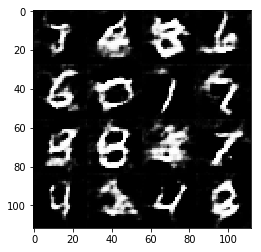

Epoch 0/2... Discriminator Loss: 1.3986... Generator Loss: 1.2261
Epoch 0/2... Discriminator Loss: 1.3059... Generator Loss: 1.0574
Epoch 0/2... Discriminator Loss: 1.2226... Generator Loss: 1.1096
Epoch 0/2... Discriminator Loss: 1.3231... Generator Loss: 0.6467
Epoch 0/2... Discriminator Loss: 1.2873... Generator Loss: 1.2120


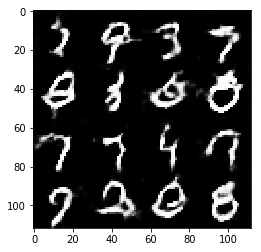

Epoch 0/2... Discriminator Loss: 1.3213... Generator Loss: 0.9676
Epoch 0/2... Discriminator Loss: 1.2692... Generator Loss: 1.0963
Epoch 0/2... Discriminator Loss: 1.2127... Generator Loss: 0.7002
Epoch 0/2... Discriminator Loss: 1.3530... Generator Loss: 0.9069
Epoch 0/2... Discriminator Loss: 1.3714... Generator Loss: 0.8803


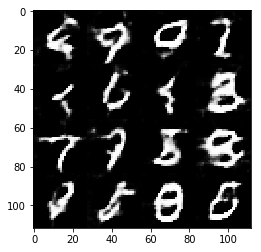

Epoch 0/2... Discriminator Loss: 1.3619... Generator Loss: 0.9243
Epoch 0/2... Discriminator Loss: 1.0902... Generator Loss: 1.0324
Epoch 0/2... Discriminator Loss: 1.3619... Generator Loss: 1.2966
Epoch 0/2... Discriminator Loss: 1.3715... Generator Loss: 1.2716
Epoch 0/2... Discriminator Loss: 1.3577... Generator Loss: 1.0039


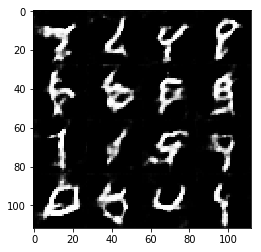

Epoch 0/2... Discriminator Loss: 1.2887... Generator Loss: 0.8073
Epoch 0/2... Discriminator Loss: 1.2124... Generator Loss: 1.0447
Epoch 0/2... Discriminator Loss: 1.1571... Generator Loss: 0.9627
Epoch 0/2... Discriminator Loss: 1.3949... Generator Loss: 0.9156
Epoch 0/2... Discriminator Loss: 1.5073... Generator Loss: 0.8235


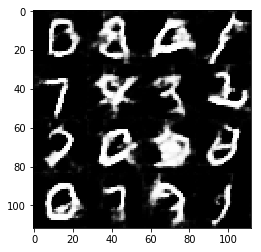

Epoch 0/2... Discriminator Loss: 1.3532... Generator Loss: 1.1086
Epoch 0/2... Discriminator Loss: 1.2433... Generator Loss: 1.0901
Epoch 0/2... Discriminator Loss: 1.2315... Generator Loss: 1.1035
Epoch 0/2... Discriminator Loss: 1.4399... Generator Loss: 1.1793
Epoch 0/2... Discriminator Loss: 1.3736... Generator Loss: 0.9705


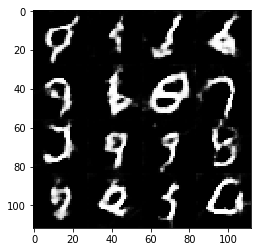

Epoch 0/2... Discriminator Loss: 1.2638... Generator Loss: 1.1140
Epoch 0/2... Discriminator Loss: 1.1706... Generator Loss: 0.9712
Epoch 0/2... Discriminator Loss: 1.4139... Generator Loss: 0.8118
Epoch 0/2... Discriminator Loss: 1.3395... Generator Loss: 0.9955
Epoch 0/2... Discriminator Loss: 1.4569... Generator Loss: 1.0711


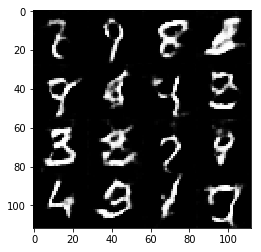

Epoch 0/2... Discriminator Loss: 1.4806... Generator Loss: 0.8153
Epoch 0/2... Discriminator Loss: 1.3143... Generator Loss: 0.8968
Epoch 0/2... Discriminator Loss: 1.2850... Generator Loss: 1.2107
Epoch 0/2... Discriminator Loss: 1.5547... Generator Loss: 1.2160
Epoch 0/2... Discriminator Loss: 1.2519... Generator Loss: 0.8791


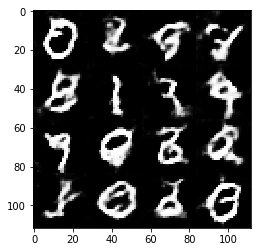

Epoch 0/2... Discriminator Loss: 1.3113... Generator Loss: 0.9174
Epoch 0/2... Discriminator Loss: 1.1989... Generator Loss: 1.0283
Epoch 0/2... Discriminator Loss: 1.2430... Generator Loss: 1.0005
Epoch 0/2... Discriminator Loss: 1.4202... Generator Loss: 1.1092
Epoch 0/2... Discriminator Loss: 1.1708... Generator Loss: 1.0564


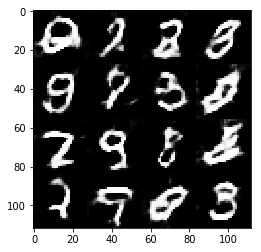

Epoch 0/2... Discriminator Loss: 1.3727... Generator Loss: 0.8859
Epoch 0/2... Discriminator Loss: 1.4802... Generator Loss: 0.9197
Epoch 0/2... Discriminator Loss: 1.2342... Generator Loss: 0.8435
Epoch 0/2... Discriminator Loss: 1.2471... Generator Loss: 0.9825
Epoch 0/2... Discriminator Loss: 1.4217... Generator Loss: 0.8165


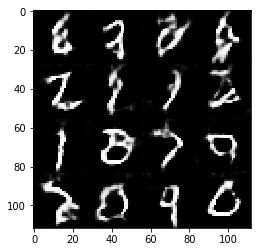

Epoch 0/2... Discriminator Loss: 1.2200... Generator Loss: 0.9714
Epoch 0/2... Discriminator Loss: 1.2957... Generator Loss: 1.0324
Epoch 0/2... Discriminator Loss: 1.3408... Generator Loss: 0.8708
Epoch 0/2... Discriminator Loss: 1.2876... Generator Loss: 0.9430
Epoch 0/2... Discriminator Loss: 1.2713... Generator Loss: 0.9836


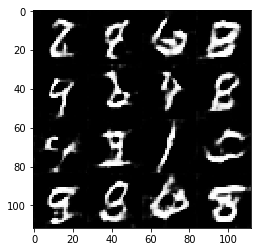

Epoch 0/2... Discriminator Loss: 1.2080... Generator Loss: 0.8535
Epoch 0/2... Discriminator Loss: 1.1872... Generator Loss: 0.8617
Epoch 0/2... Discriminator Loss: 1.3020... Generator Loss: 1.0231
Epoch 0/2... Discriminator Loss: 1.2260... Generator Loss: 1.1053
Epoch 0/2... Discriminator Loss: 1.5473... Generator Loss: 0.9346


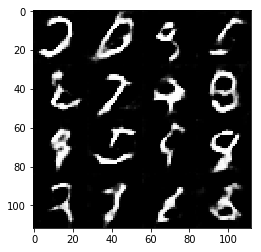

Epoch 0/2... Discriminator Loss: 1.0606... Generator Loss: 1.2032
Epoch 0/2... Discriminator Loss: 1.3515... Generator Loss: 1.0196
Epoch 0/2... Discriminator Loss: 1.3150... Generator Loss: 1.2367
Epoch 0/2... Discriminator Loss: 1.3250... Generator Loss: 0.7871
Epoch 0/2... Discriminator Loss: 1.3359... Generator Loss: 0.9842


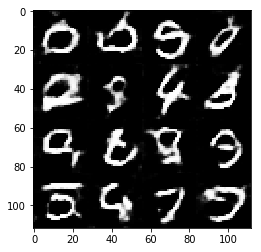

Epoch 0/2... Discriminator Loss: 1.2611... Generator Loss: 1.0584
Epoch 0/2... Discriminator Loss: 1.2662... Generator Loss: 1.0743
Epoch 0/2... Discriminator Loss: 1.3742... Generator Loss: 1.1203
Epoch 0/2... Discriminator Loss: 1.2891... Generator Loss: 1.0021
Epoch 0/2... Discriminator Loss: 1.2223... Generator Loss: 0.7992


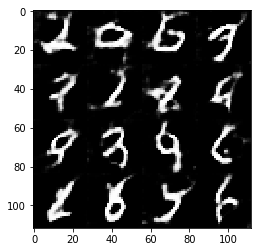

Epoch 0/2... Discriminator Loss: 1.2584... Generator Loss: 1.1923
Epoch 0/2... Discriminator Loss: 1.1801... Generator Loss: 1.0496
Epoch 0/2... Discriminator Loss: 1.2507... Generator Loss: 0.9538
Epoch 1/2... Discriminator Loss: 1.3414... Generator Loss: 0.5934
Epoch 1/2... Discriminator Loss: 1.2323... Generator Loss: 0.9527


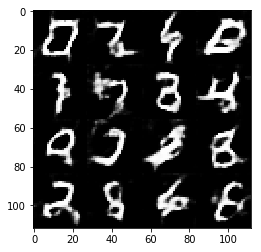

Epoch 1/2... Discriminator Loss: 1.3070... Generator Loss: 1.0423
Epoch 1/2... Discriminator Loss: 1.1685... Generator Loss: 0.9960
Epoch 1/2... Discriminator Loss: 1.2068... Generator Loss: 0.8813
Epoch 1/2... Discriminator Loss: 1.2545... Generator Loss: 1.1309
Epoch 1/2... Discriminator Loss: 1.2937... Generator Loss: 1.1711


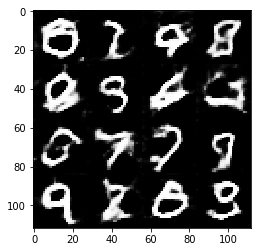

Epoch 1/2... Discriminator Loss: 1.1576... Generator Loss: 1.0012
Epoch 1/2... Discriminator Loss: 1.3452... Generator Loss: 0.8456
Epoch 1/2... Discriminator Loss: 1.3251... Generator Loss: 0.9590
Epoch 1/2... Discriminator Loss: 1.3436... Generator Loss: 0.9765
Epoch 1/2... Discriminator Loss: 1.4784... Generator Loss: 0.8671


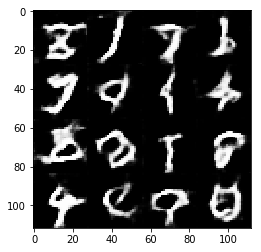

Epoch 1/2... Discriminator Loss: 1.4955... Generator Loss: 0.9029
Epoch 1/2... Discriminator Loss: 1.3425... Generator Loss: 1.0467
Epoch 1/2... Discriminator Loss: 1.2266... Generator Loss: 1.1954
Epoch 1/2... Discriminator Loss: 1.2552... Generator Loss: 0.9369
Epoch 1/2... Discriminator Loss: 1.1527... Generator Loss: 1.0119


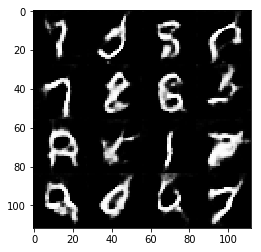

Epoch 1/2... Discriminator Loss: 1.3004... Generator Loss: 1.2825
Epoch 1/2... Discriminator Loss: 1.3435... Generator Loss: 0.8997
Epoch 1/2... Discriminator Loss: 1.1593... Generator Loss: 1.0948
Epoch 1/2... Discriminator Loss: 1.1987... Generator Loss: 0.9038
Epoch 1/2... Discriminator Loss: 1.2740... Generator Loss: 0.8409


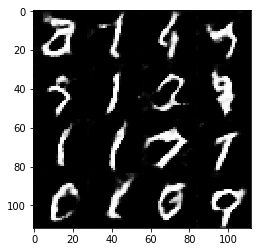

Epoch 1/2... Discriminator Loss: 1.3748... Generator Loss: 1.0763
Epoch 1/2... Discriminator Loss: 1.1761... Generator Loss: 1.0390
Epoch 1/2... Discriminator Loss: 1.3706... Generator Loss: 0.6988
Epoch 1/2... Discriminator Loss: 1.3421... Generator Loss: 1.2698
Epoch 1/2... Discriminator Loss: 1.4651... Generator Loss: 1.0843


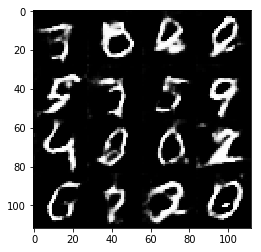

Epoch 1/2... Discriminator Loss: 1.1694... Generator Loss: 0.8501
Epoch 1/2... Discriminator Loss: 1.3001... Generator Loss: 0.9806
Epoch 1/2... Discriminator Loss: 1.2939... Generator Loss: 0.8431
Epoch 1/2... Discriminator Loss: 1.4519... Generator Loss: 0.8887
Epoch 1/2... Discriminator Loss: 1.3086... Generator Loss: 0.9780


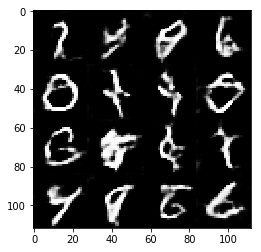

Epoch 1/2... Discriminator Loss: 1.2251... Generator Loss: 0.9653
Epoch 1/2... Discriminator Loss: 1.2895... Generator Loss: 1.0030
Epoch 1/2... Discriminator Loss: 1.2086... Generator Loss: 1.0539
Epoch 1/2... Discriminator Loss: 1.3593... Generator Loss: 1.0007
Epoch 1/2... Discriminator Loss: 1.1801... Generator Loss: 1.0829


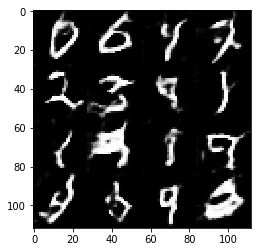

Epoch 1/2... Discriminator Loss: 1.3614... Generator Loss: 1.0979
Epoch 1/2... Discriminator Loss: 1.3889... Generator Loss: 0.8649
Epoch 1/2... Discriminator Loss: 1.4408... Generator Loss: 1.2127
Epoch 1/2... Discriminator Loss: 1.4090... Generator Loss: 1.1013
Epoch 1/2... Discriminator Loss: 1.1227... Generator Loss: 1.0377


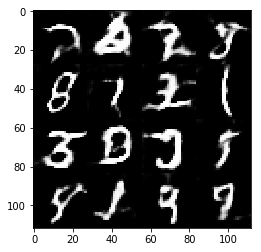

Epoch 1/2... Discriminator Loss: 1.3149... Generator Loss: 1.0395
Epoch 1/2... Discriminator Loss: 1.1684... Generator Loss: 0.9394
Epoch 1/2... Discriminator Loss: 1.4039... Generator Loss: 1.2231
Epoch 1/2... Discriminator Loss: 1.2293... Generator Loss: 0.9573
Epoch 1/2... Discriminator Loss: 1.2353... Generator Loss: 0.9423


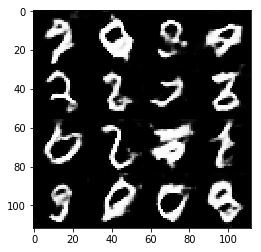

Epoch 1/2... Discriminator Loss: 1.2371... Generator Loss: 0.9835
Epoch 1/2... Discriminator Loss: 1.4669... Generator Loss: 0.7734
Epoch 1/2... Discriminator Loss: 1.2955... Generator Loss: 1.0768
Epoch 1/2... Discriminator Loss: 1.2499... Generator Loss: 0.9848
Epoch 1/2... Discriminator Loss: 1.1828... Generator Loss: 1.1002


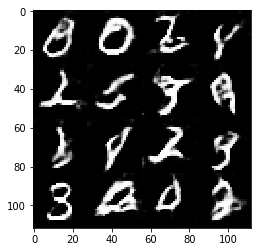

Epoch 1/2... Discriminator Loss: 1.2584... Generator Loss: 0.9289
Epoch 1/2... Discriminator Loss: 1.2360... Generator Loss: 1.1025
Epoch 1/2... Discriminator Loss: 1.2495... Generator Loss: 1.2216
Epoch 1/2... Discriminator Loss: 1.3903... Generator Loss: 0.8210
Epoch 1/2... Discriminator Loss: 1.1355... Generator Loss: 1.2472


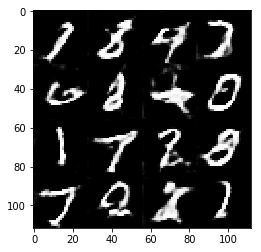

Epoch 1/2... Discriminator Loss: 1.3710... Generator Loss: 0.8769
Epoch 1/2... Discriminator Loss: 1.5160... Generator Loss: 0.8511
Epoch 1/2... Discriminator Loss: 1.3182... Generator Loss: 1.0343
Epoch 1/2... Discriminator Loss: 1.3745... Generator Loss: 1.0732
Epoch 1/2... Discriminator Loss: 1.1650... Generator Loss: 1.0275


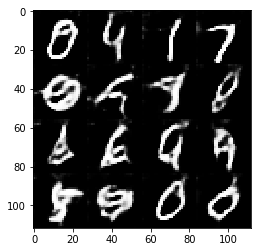

Epoch 1/2... Discriminator Loss: 1.2596... Generator Loss: 0.9057
Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.8590
Epoch 1/2... Discriminator Loss: 1.3630... Generator Loss: 1.1406
Epoch 1/2... Discriminator Loss: 1.2120... Generator Loss: 1.0766
Epoch 1/2... Discriminator Loss: 1.3542... Generator Loss: 1.1144


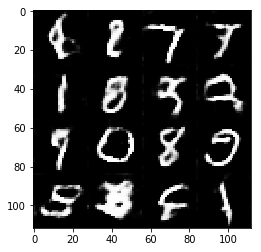

Epoch 1/2... Discriminator Loss: 1.3245... Generator Loss: 0.8664
Epoch 1/2... Discriminator Loss: 1.2404... Generator Loss: 1.0278
Epoch 1/2... Discriminator Loss: 1.0743... Generator Loss: 0.8730
Epoch 1/2... Discriminator Loss: 1.3711... Generator Loss: 1.0467
Epoch 1/2... Discriminator Loss: 1.2551... Generator Loss: 0.9749


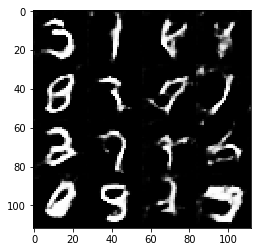

Epoch 1/2... Discriminator Loss: 1.1666... Generator Loss: 1.0479
Epoch 1/2... Discriminator Loss: 1.2150... Generator Loss: 1.1709
Epoch 1/2... Discriminator Loss: 1.3389... Generator Loss: 1.0132
Epoch 1/2... Discriminator Loss: 1.4254... Generator Loss: 0.9874
Epoch 1/2... Discriminator Loss: 1.1312... Generator Loss: 1.1434


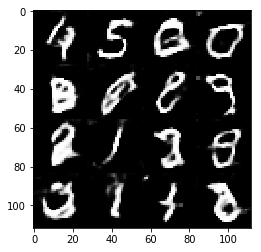

Epoch 1/2... Discriminator Loss: 1.4169... Generator Loss: 1.1031
Epoch 1/2... Discriminator Loss: 1.3897... Generator Loss: 0.9621
Epoch 1/2... Discriminator Loss: 1.1979... Generator Loss: 0.8897
Epoch 1/2... Discriminator Loss: 1.3450... Generator Loss: 0.9728
Epoch 1/2... Discriminator Loss: 1.2315... Generator Loss: 1.1586


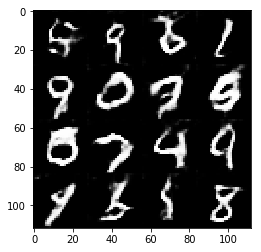

Epoch 1/2... Discriminator Loss: 1.1508... Generator Loss: 0.8967
Epoch 1/2... Discriminator Loss: 1.1560... Generator Loss: 1.1814
Epoch 1/2... Discriminator Loss: 1.2138... Generator Loss: 0.9785
Epoch 1/2... Discriminator Loss: 1.2686... Generator Loss: 0.8392
Epoch 1/2... Discriminator Loss: 1.3871... Generator Loss: 1.3854


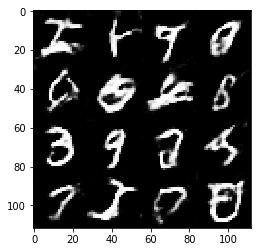

Epoch 1/2... Discriminator Loss: 1.2864... Generator Loss: 1.0791
Epoch 1/2... Discriminator Loss: 0.9857... Generator Loss: 1.2200
Epoch 1/2... Discriminator Loss: 1.1396... Generator Loss: 0.7683
Epoch 1/2... Discriminator Loss: 1.2687... Generator Loss: 1.2379
Epoch 1/2... Discriminator Loss: 1.0814... Generator Loss: 0.9541


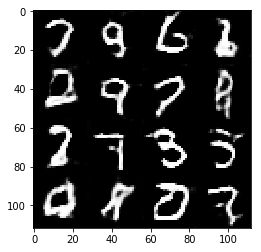

Epoch 1/2... Discriminator Loss: 1.2801... Generator Loss: 0.8507
Epoch 1/2... Discriminator Loss: 1.2267... Generator Loss: 1.0362
Epoch 1/2... Discriminator Loss: 1.1403... Generator Loss: 0.9576
Epoch 1/2... Discriminator Loss: 1.3195... Generator Loss: 1.0230
Epoch 1/2... Discriminator Loss: 1.2678... Generator Loss: 1.3458


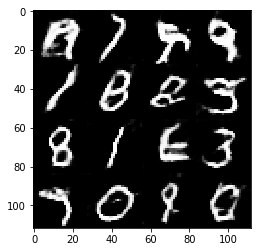

Epoch 1/2... Discriminator Loss: 1.1958... Generator Loss: 0.9535
Epoch 1/2... Discriminator Loss: 1.4042... Generator Loss: 1.2612
Epoch 1/2... Discriminator Loss: 1.1940... Generator Loss: 0.8076
Epoch 1/2... Discriminator Loss: 1.1932... Generator Loss: 1.0374
Epoch 1/2... Discriminator Loss: 1.2755... Generator Loss: 0.8672


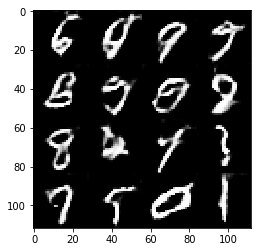

Epoch 1/2... Discriminator Loss: 1.4328... Generator Loss: 1.0606
Epoch 1/2... Discriminator Loss: 1.2308... Generator Loss: 0.8133
Epoch 1/2... Discriminator Loss: 1.1277... Generator Loss: 1.4010
Epoch 1/2... Discriminator Loss: 1.3590... Generator Loss: 0.9362
Epoch 1/2... Discriminator Loss: 1.2193... Generator Loss: 1.2472


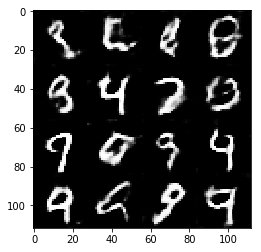

Epoch 1/2... Discriminator Loss: 1.1840... Generator Loss: 0.8407
Epoch 1/2... Discriminator Loss: 1.3421... Generator Loss: 1.1638
Epoch 1/2... Discriminator Loss: 1.1828... Generator Loss: 0.9806
Epoch 1/2... Discriminator Loss: 1.2814... Generator Loss: 1.0226
Epoch 1/2... Discriminator Loss: 1.2110... Generator Loss: 1.3405


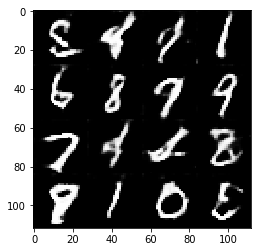

Epoch 1/2... Discriminator Loss: 1.4310... Generator Loss: 0.6529
Epoch 1/2... Discriminator Loss: 1.2093... Generator Loss: 1.1805
Epoch 1/2... Discriminator Loss: 1.2832... Generator Loss: 0.7994
Epoch 1/2... Discriminator Loss: 1.3377... Generator Loss: 0.8981
Epoch 1/2... Discriminator Loss: 1.4804... Generator Loss: 1.0645


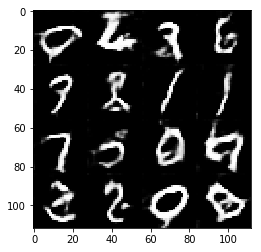

Epoch 1/2... Discriminator Loss: 1.4962... Generator Loss: 0.9612
Epoch 1/2... Discriminator Loss: 1.2128... Generator Loss: 1.3723
Epoch 1/2... Discriminator Loss: 1.1571... Generator Loss: 1.2009
Epoch 1/2... Discriminator Loss: 1.2388... Generator Loss: 1.0738
Epoch 1/2... Discriminator Loss: 1.2930... Generator Loss: 1.0657


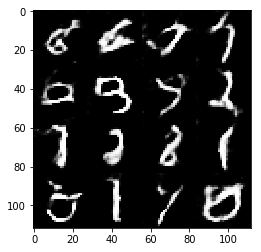

Epoch 1/2... Discriminator Loss: 1.1799... Generator Loss: 1.0046
Epoch 1/2... Discriminator Loss: 1.1300... Generator Loss: 0.6928
Epoch 1/2... Discriminator Loss: 1.2249... Generator Loss: 0.8428
Epoch 1/2... Discriminator Loss: 1.2138... Generator Loss: 0.8429
Epoch 1/2... Discriminator Loss: 1.0080... Generator Loss: 1.1678


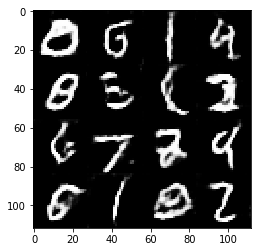

Epoch 1/2... Discriminator Loss: 1.3815... Generator Loss: 0.8991
Epoch 1/2... Discriminator Loss: 1.4094... Generator Loss: 1.3217
Epoch 1/2... Discriminator Loss: 1.3201... Generator Loss: 1.0758
Epoch 1/2... Discriminator Loss: 1.1390... Generator Loss: 1.1409
Epoch 1/2... Discriminator Loss: 1.2198... Generator Loss: 0.8125


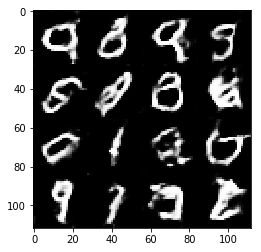

Epoch 1/2... Discriminator Loss: 1.2729... Generator Loss: 0.8989
Epoch 1/2... Discriminator Loss: 1.4269... Generator Loss: 0.9502
Epoch 1/2... Discriminator Loss: 1.3437... Generator Loss: 1.0266
Epoch 1/2... Discriminator Loss: 1.4304... Generator Loss: 0.9713
Epoch 1/2... Discriminator Loss: 1.2251... Generator Loss: 1.1000


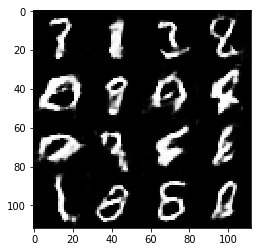

Epoch 1/2... Discriminator Loss: 1.0677... Generator Loss: 0.8429
Epoch 1/2... Discriminator Loss: 1.5391... Generator Loss: 0.8962
Epoch 1/2... Discriminator Loss: 1.1934... Generator Loss: 0.9466
Epoch 1/2... Discriminator Loss: 1.1031... Generator Loss: 0.9151
Epoch 1/2... Discriminator Loss: 1.1834... Generator Loss: 1.1454


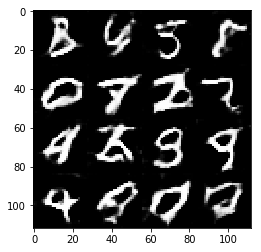

Epoch 1/2... Discriminator Loss: 1.1606... Generator Loss: 1.3672
Epoch 1/2... Discriminator Loss: 1.2990... Generator Loss: 1.2054
Epoch 1/2... Discriminator Loss: 1.5022... Generator Loss: 0.9731
Epoch 1/2... Discriminator Loss: 1.1803... Generator Loss: 1.0627
Epoch 1/2... Discriminator Loss: 0.9588... Generator Loss: 1.3010


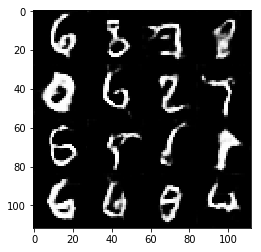

Epoch 1/2... Discriminator Loss: 1.1848... Generator Loss: 0.9241
Epoch 1/2... Discriminator Loss: 1.1891... Generator Loss: 1.3819
Epoch 1/2... Discriminator Loss: 1.4052... Generator Loss: 1.0434
Epoch 1/2... Discriminator Loss: 1.2618... Generator Loss: 1.0914
Epoch 1/2... Discriminator Loss: 1.1877... Generator Loss: 1.1069


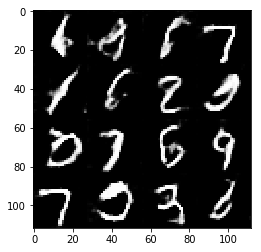

Epoch 1/2... Discriminator Loss: 1.1046... Generator Loss: 1.1523
Epoch 1/2... Discriminator Loss: 1.3421... Generator Loss: 0.8673
Epoch 1/2... Discriminator Loss: 1.1062... Generator Loss: 1.1915
Epoch 1/2... Discriminator Loss: 1.1725... Generator Loss: 1.2310
Epoch 1/2... Discriminator Loss: 1.1908... Generator Loss: 1.2118


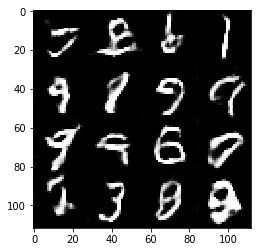

Epoch 1/2... Discriminator Loss: 1.0967... Generator Loss: 1.0583
Epoch 1/2... Discriminator Loss: 1.2198... Generator Loss: 0.8311
Epoch 1/2... Discriminator Loss: 1.0709... Generator Loss: 0.9142
Epoch 1/2... Discriminator Loss: 1.3801... Generator Loss: 1.0036
Epoch 1/2... Discriminator Loss: 1.1252... Generator Loss: 1.3456


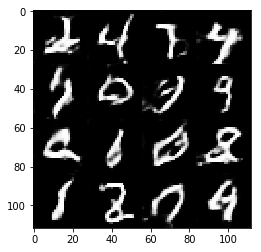

Epoch 1/2... Discriminator Loss: 1.2827... Generator Loss: 0.8964
Epoch 1/2... Discriminator Loss: 1.1032... Generator Loss: 1.0245
Epoch 1/2... Discriminator Loss: 1.0857... Generator Loss: 1.3500
Epoch 1/2... Discriminator Loss: 1.2577... Generator Loss: 0.8122
Epoch 1/2... Discriminator Loss: 1.2971... Generator Loss: 1.2282


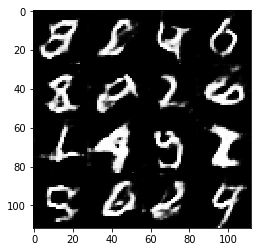

Epoch 1/2... Discriminator Loss: 1.3310... Generator Loss: 1.5260
Epoch 1/2... Discriminator Loss: 1.0429... Generator Loss: 1.3082
Epoch 1/2... Discriminator Loss: 1.1489... Generator Loss: 1.2211
Epoch 1/2... Discriminator Loss: 1.3578... Generator Loss: 1.1196
Epoch 1/2... Discriminator Loss: 1.1214... Generator Loss: 1.0918


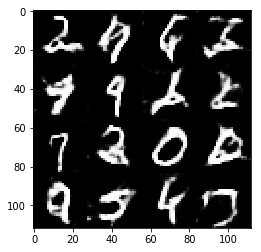

Epoch 1/2... Discriminator Loss: 1.4628... Generator Loss: 1.0956
Epoch 1/2... Discriminator Loss: 1.0939... Generator Loss: 0.9237
Epoch 1/2... Discriminator Loss: 1.2343... Generator Loss: 1.1633
Epoch 1/2... Discriminator Loss: 1.2211... Generator Loss: 1.1035
Epoch 1/2... Discriminator Loss: 1.1909... Generator Loss: 0.7798


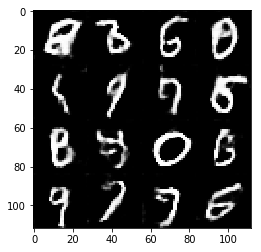

Epoch 1/2... Discriminator Loss: 1.1494... Generator Loss: 0.9378
Epoch 1/2... Discriminator Loss: 1.3158... Generator Loss: 1.0541
Epoch 1/2... Discriminator Loss: 1.1631... Generator Loss: 1.2025
Epoch 1/2... Discriminator Loss: 1.0575... Generator Loss: 1.2241
Epoch 1/2... Discriminator Loss: 1.2270... Generator Loss: 1.2643


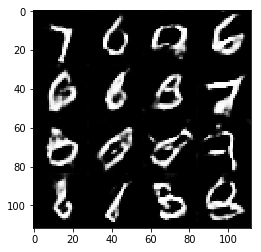

Epoch 1/2... Discriminator Loss: 1.2520... Generator Loss: 1.3676
Epoch 1/2... Discriminator Loss: 1.1266... Generator Loss: 0.8226
Epoch 1/2... Discriminator Loss: 1.1753... Generator Loss: 1.1738
Epoch 1/2... Discriminator Loss: 1.3369... Generator Loss: 1.5368
Epoch 1/2... Discriminator Loss: 1.3701... Generator Loss: 1.5837


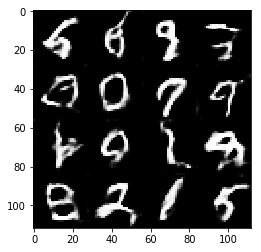

Epoch 1/2... Discriminator Loss: 1.2024... Generator Loss: 0.9200


In [12]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 1.0142... Generator Loss: 1.7017
Epoch 0/1... Discriminator Loss: 1.3598... Generator Loss: 1.2461
Epoch 0/1... Discriminator Loss: 0.9547... Generator Loss: 2.0257
Epoch 0/1... Discriminator Loss: 0.9436... Generator Loss: 1.6733


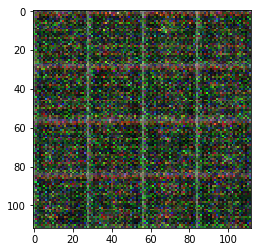

Epoch 0/1... Discriminator Loss: 1.0284... Generator Loss: 1.4474
Epoch 0/1... Discriminator Loss: 1.0904... Generator Loss: 1.4596
Epoch 0/1... Discriminator Loss: 1.0922... Generator Loss: 1.7745
Epoch 0/1... Discriminator Loss: 0.9955... Generator Loss: 1.6450
Epoch 0/1... Discriminator Loss: 1.0265... Generator Loss: 1.7462


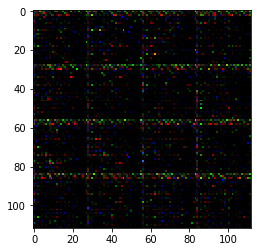

Epoch 0/1... Discriminator Loss: 1.5886... Generator Loss: 1.0017
Epoch 0/1... Discriminator Loss: 0.8529... Generator Loss: 1.7613
Epoch 0/1... Discriminator Loss: 0.9387... Generator Loss: 2.1871
Epoch 0/1... Discriminator Loss: 1.0774... Generator Loss: 2.3664
Epoch 0/1... Discriminator Loss: 0.6615... Generator Loss: 3.5211


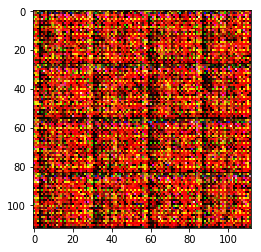

Epoch 0/1... Discriminator Loss: 0.6847... Generator Loss: 2.4499
Epoch 0/1... Discriminator Loss: 0.6933... Generator Loss: 2.4828
Epoch 0/1... Discriminator Loss: 0.7299... Generator Loss: 2.3973
Epoch 0/1... Discriminator Loss: 0.7705... Generator Loss: 2.9568
Epoch 0/1... Discriminator Loss: 0.5929... Generator Loss: 4.5594


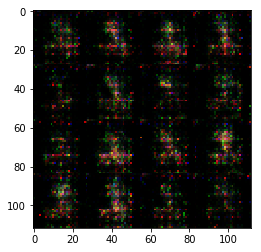

Epoch 0/1... Discriminator Loss: 0.7337... Generator Loss: 2.4795
Epoch 0/1... Discriminator Loss: 0.6254... Generator Loss: 4.1613
Epoch 0/1... Discriminator Loss: 0.4859... Generator Loss: 4.6450
Epoch 0/1... Discriminator Loss: 0.5536... Generator Loss: 3.2598
Epoch 0/1... Discriminator Loss: 0.4623... Generator Loss: 4.3971


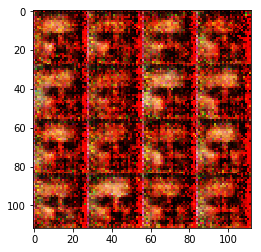

Epoch 0/1... Discriminator Loss: 0.5944... Generator Loss: 3.6573
Epoch 0/1... Discriminator Loss: 0.6319... Generator Loss: 4.1116
Epoch 0/1... Discriminator Loss: 0.6178... Generator Loss: 3.3139
Epoch 0/1... Discriminator Loss: 0.7388... Generator Loss: 2.8706
Epoch 0/1... Discriminator Loss: 0.4829... Generator Loss: 4.1116


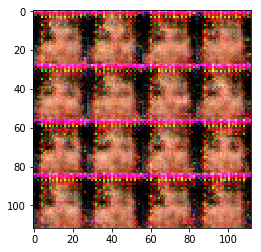

Epoch 0/1... Discriminator Loss: 0.6763... Generator Loss: 3.1264
Epoch 0/1... Discriminator Loss: 0.9380... Generator Loss: 1.4658
Epoch 0/1... Discriminator Loss: 0.6107... Generator Loss: 3.7488
Epoch 0/1... Discriminator Loss: 0.5625... Generator Loss: 4.0979
Epoch 0/1... Discriminator Loss: 0.6485... Generator Loss: 3.7065


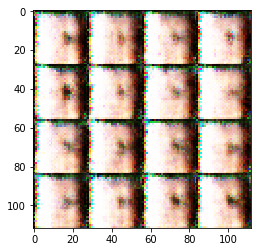

Epoch 0/1... Discriminator Loss: 0.5009... Generator Loss: 4.5305
Epoch 0/1... Discriminator Loss: 0.5454... Generator Loss: 2.9725
Epoch 0/1... Discriminator Loss: 0.6380... Generator Loss: 2.1231
Epoch 0/1... Discriminator Loss: 0.8017... Generator Loss: 3.6329
Epoch 0/1... Discriminator Loss: 0.9488... Generator Loss: 1.7170


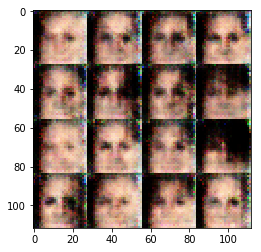

Epoch 0/1... Discriminator Loss: 0.7428... Generator Loss: 2.7151
Epoch 0/1... Discriminator Loss: 1.3237... Generator Loss: 1.5525
Epoch 0/1... Discriminator Loss: 0.8845... Generator Loss: 2.4539
Epoch 0/1... Discriminator Loss: 0.9920... Generator Loss: 2.3771
Epoch 0/1... Discriminator Loss: 1.0639... Generator Loss: 1.3655


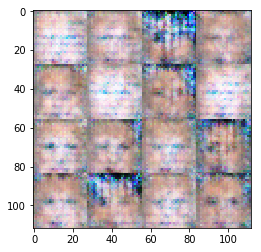

Epoch 0/1... Discriminator Loss: 1.6258... Generator Loss: 1.0088
Epoch 0/1... Discriminator Loss: 1.2943... Generator Loss: 1.2743
Epoch 0/1... Discriminator Loss: 1.3473... Generator Loss: 0.9766
Epoch 0/1... Discriminator Loss: 1.3014... Generator Loss: 1.4370
Epoch 0/1... Discriminator Loss: 2.1731... Generator Loss: 0.7548


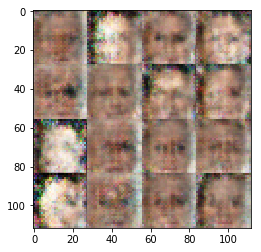

Epoch 0/1... Discriminator Loss: 1.7514... Generator Loss: 0.7498
Epoch 0/1... Discriminator Loss: 1.5832... Generator Loss: 0.9894
Epoch 0/1... Discriminator Loss: 1.5140... Generator Loss: 1.0610
Epoch 0/1... Discriminator Loss: 1.7851... Generator Loss: 0.9459
Epoch 0/1... Discriminator Loss: 1.2560... Generator Loss: 1.2190


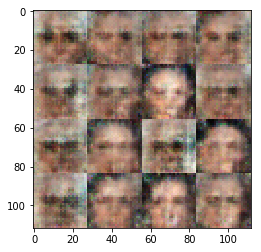

Epoch 0/1... Discriminator Loss: 1.4824... Generator Loss: 0.8430
Epoch 0/1... Discriminator Loss: 0.9447... Generator Loss: 1.6224
Epoch 0/1... Discriminator Loss: 1.6129... Generator Loss: 1.2412
Epoch 0/1... Discriminator Loss: 1.2605... Generator Loss: 1.1303
Epoch 0/1... Discriminator Loss: 1.7127... Generator Loss: 0.6944


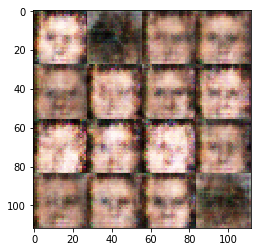

Epoch 0/1... Discriminator Loss: 1.1655... Generator Loss: 1.1601
Epoch 0/1... Discriminator Loss: 1.3561... Generator Loss: 1.4140
Epoch 0/1... Discriminator Loss: 1.8986... Generator Loss: 0.8538
Epoch 0/1... Discriminator Loss: 1.4637... Generator Loss: 1.0688
Epoch 0/1... Discriminator Loss: 1.3316... Generator Loss: 1.3873


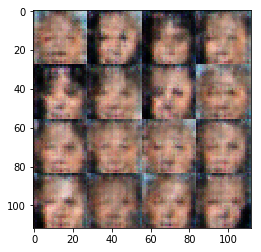

Epoch 0/1... Discriminator Loss: 1.4095... Generator Loss: 1.1114
Epoch 0/1... Discriminator Loss: 1.4884... Generator Loss: 0.9104
Epoch 0/1... Discriminator Loss: 1.3431... Generator Loss: 1.1506
Epoch 0/1... Discriminator Loss: 1.2517... Generator Loss: 1.1296
Epoch 0/1... Discriminator Loss: 1.3489... Generator Loss: 1.2093


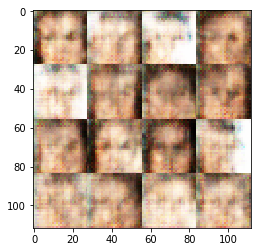

Epoch 0/1... Discriminator Loss: 1.5404... Generator Loss: 1.3377
Epoch 0/1... Discriminator Loss: 1.2893... Generator Loss: 0.9759
Epoch 0/1... Discriminator Loss: 1.2672... Generator Loss: 1.0879
Epoch 0/1... Discriminator Loss: 1.2210... Generator Loss: 1.0670
Epoch 0/1... Discriminator Loss: 1.4750... Generator Loss: 0.9774


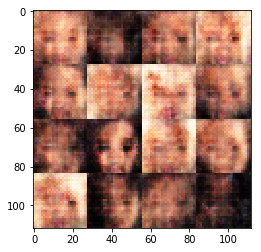

Epoch 0/1... Discriminator Loss: 1.3941... Generator Loss: 1.0775
Epoch 0/1... Discriminator Loss: 1.4012... Generator Loss: 1.3149
Epoch 0/1... Discriminator Loss: 1.6011... Generator Loss: 1.0721
Epoch 0/1... Discriminator Loss: 1.3302... Generator Loss: 1.0733
Epoch 0/1... Discriminator Loss: 1.2400... Generator Loss: 0.9757


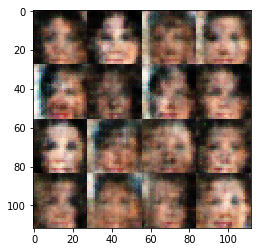

Epoch 0/1... Discriminator Loss: 1.2598... Generator Loss: 1.2084
Epoch 0/1... Discriminator Loss: 1.5468... Generator Loss: 0.6977
Epoch 0/1... Discriminator Loss: 1.4221... Generator Loss: 1.0724
Epoch 0/1... Discriminator Loss: 1.2851... Generator Loss: 1.2639
Epoch 0/1... Discriminator Loss: 1.1554... Generator Loss: 1.1008


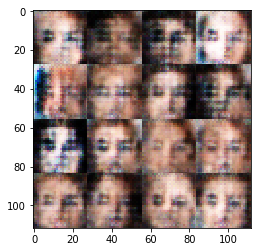

Epoch 0/1... Discriminator Loss: 1.2629... Generator Loss: 1.0062
Epoch 0/1... Discriminator Loss: 1.4361... Generator Loss: 1.2989
Epoch 0/1... Discriminator Loss: 1.3647... Generator Loss: 1.1472
Epoch 0/1... Discriminator Loss: 1.1106... Generator Loss: 1.2907
Epoch 0/1... Discriminator Loss: 1.3312... Generator Loss: 1.1311


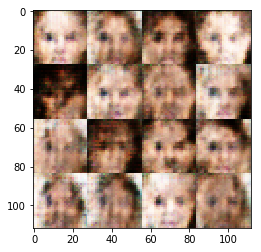

Epoch 0/1... Discriminator Loss: 1.2610... Generator Loss: 1.0816
Epoch 0/1... Discriminator Loss: 1.1536... Generator Loss: 1.0386
Epoch 0/1... Discriminator Loss: 1.0817... Generator Loss: 1.0132
Epoch 0/1... Discriminator Loss: 1.3036... Generator Loss: 0.9485
Epoch 0/1... Discriminator Loss: 1.2765... Generator Loss: 1.1332


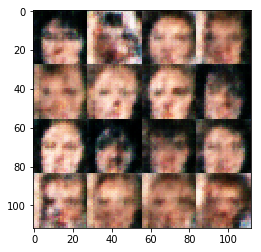

Epoch 0/1... Discriminator Loss: 1.3455... Generator Loss: 1.1073
Epoch 0/1... Discriminator Loss: 1.4795... Generator Loss: 1.0657
Epoch 0/1... Discriminator Loss: 1.3441... Generator Loss: 1.0973
Epoch 0/1... Discriminator Loss: 1.2220... Generator Loss: 1.0605
Epoch 0/1... Discriminator Loss: 1.2985... Generator Loss: 1.0443


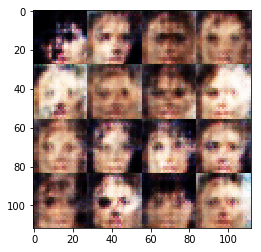

Epoch 0/1... Discriminator Loss: 1.3914... Generator Loss: 0.9513
Epoch 0/1... Discriminator Loss: 1.2674... Generator Loss: 1.0082
Epoch 0/1... Discriminator Loss: 1.3007... Generator Loss: 0.9937
Epoch 0/1... Discriminator Loss: 1.3799... Generator Loss: 0.9473
Epoch 0/1... Discriminator Loss: 1.4560... Generator Loss: 0.9703


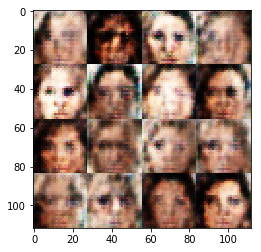

Epoch 0/1... Discriminator Loss: 1.2682... Generator Loss: 1.1334
Epoch 0/1... Discriminator Loss: 1.3744... Generator Loss: 1.2503
Epoch 0/1... Discriminator Loss: 1.3262... Generator Loss: 1.0144
Epoch 0/1... Discriminator Loss: 1.4711... Generator Loss: 0.8947
Epoch 0/1... Discriminator Loss: 1.4496... Generator Loss: 0.8979


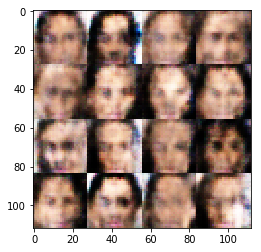

Epoch 0/1... Discriminator Loss: 1.5223... Generator Loss: 0.7834
Epoch 0/1... Discriminator Loss: 1.2459... Generator Loss: 0.9326
Epoch 0/1... Discriminator Loss: 1.2400... Generator Loss: 1.0689
Epoch 0/1... Discriminator Loss: 1.3265... Generator Loss: 1.2415
Epoch 0/1... Discriminator Loss: 1.2253... Generator Loss: 1.1142


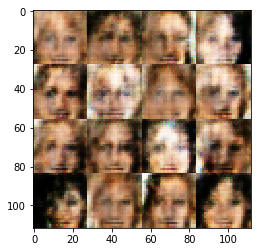

Epoch 0/1... Discriminator Loss: 1.1306... Generator Loss: 1.2214
Epoch 0/1... Discriminator Loss: 1.4719... Generator Loss: 1.0010
Epoch 0/1... Discriminator Loss: 1.4824... Generator Loss: 0.9107
Epoch 0/1... Discriminator Loss: 1.3750... Generator Loss: 1.1119
Epoch 0/1... Discriminator Loss: 1.2326... Generator Loss: 1.2308


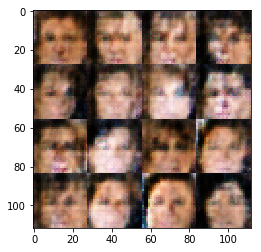

Epoch 0/1... Discriminator Loss: 1.3000... Generator Loss: 1.0476
Epoch 0/1... Discriminator Loss: 1.3964... Generator Loss: 1.0831
Epoch 0/1... Discriminator Loss: 1.4456... Generator Loss: 0.9651
Epoch 0/1... Discriminator Loss: 1.2447... Generator Loss: 1.1186
Epoch 0/1... Discriminator Loss: 1.4304... Generator Loss: 0.9725


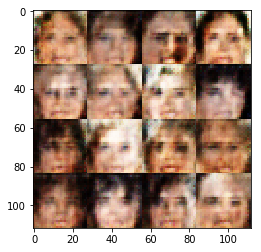

Epoch 0/1... Discriminator Loss: 1.4547... Generator Loss: 1.2949
Epoch 0/1... Discriminator Loss: 1.3940... Generator Loss: 0.9648
Epoch 0/1... Discriminator Loss: 1.3104... Generator Loss: 1.0019
Epoch 0/1... Discriminator Loss: 1.3151... Generator Loss: 1.2238
Epoch 0/1... Discriminator Loss: 1.3401... Generator Loss: 1.0408


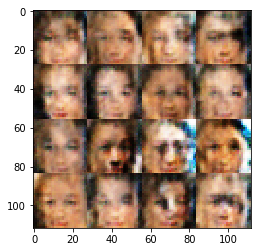

Epoch 0/1... Discriminator Loss: 1.3236... Generator Loss: 1.1955
Epoch 0/1... Discriminator Loss: 1.4015... Generator Loss: 1.1667
Epoch 0/1... Discriminator Loss: 1.4552... Generator Loss: 0.8676
Epoch 0/1... Discriminator Loss: 1.4322... Generator Loss: 0.7617
Epoch 0/1... Discriminator Loss: 1.3906... Generator Loss: 0.9766


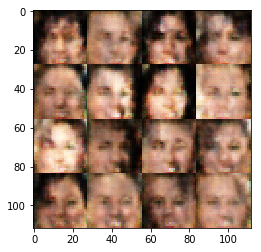

Epoch 0/1... Discriminator Loss: 1.6005... Generator Loss: 1.1227
Epoch 0/1... Discriminator Loss: 1.5767... Generator Loss: 0.8020
Epoch 0/1... Discriminator Loss: 1.3977... Generator Loss: 0.7614
Epoch 0/1... Discriminator Loss: 1.4376... Generator Loss: 0.7230
Epoch 0/1... Discriminator Loss: 1.2959... Generator Loss: 0.8985


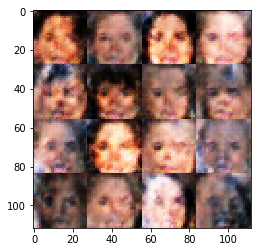

Epoch 0/1... Discriminator Loss: 1.3107... Generator Loss: 0.7928
Epoch 0/1... Discriminator Loss: 1.4607... Generator Loss: 0.6208
Epoch 0/1... Discriminator Loss: 1.5027... Generator Loss: 0.9400
Epoch 0/1... Discriminator Loss: 1.1313... Generator Loss: 1.1813
Epoch 0/1... Discriminator Loss: 1.4749... Generator Loss: 1.0030


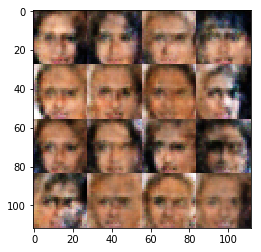

Epoch 0/1... Discriminator Loss: 1.6466... Generator Loss: 0.8576
Epoch 0/1... Discriminator Loss: 1.4348... Generator Loss: 0.8880
Epoch 0/1... Discriminator Loss: 1.5832... Generator Loss: 0.8598
Epoch 0/1... Discriminator Loss: 1.6021... Generator Loss: 0.6789
Epoch 0/1... Discriminator Loss: 1.2654... Generator Loss: 0.9737


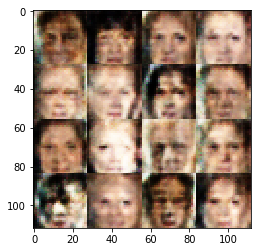

Epoch 0/1... Discriminator Loss: 1.3050... Generator Loss: 0.8196
Epoch 0/1... Discriminator Loss: 1.2881... Generator Loss: 1.0912
Epoch 0/1... Discriminator Loss: 1.6361... Generator Loss: 0.7423
Epoch 0/1... Discriminator Loss: 1.3096... Generator Loss: 1.0832
Epoch 0/1... Discriminator Loss: 1.5521... Generator Loss: 0.8463


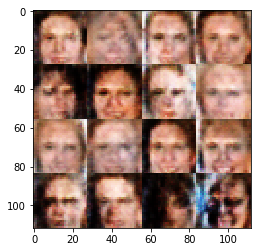

Epoch 0/1... Discriminator Loss: 1.4975... Generator Loss: 0.8170
Epoch 0/1... Discriminator Loss: 1.3692... Generator Loss: 0.9692
Epoch 0/1... Discriminator Loss: 1.5404... Generator Loss: 1.1235
Epoch 0/1... Discriminator Loss: 1.4371... Generator Loss: 1.0448
Epoch 0/1... Discriminator Loss: 1.4840... Generator Loss: 0.7750


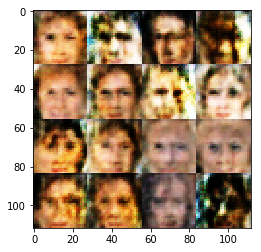

Epoch 0/1... Discriminator Loss: 1.3673... Generator Loss: 0.8654
Epoch 0/1... Discriminator Loss: 1.3958... Generator Loss: 0.9101
Epoch 0/1... Discriminator Loss: 1.4377... Generator Loss: 0.9060
Epoch 0/1... Discriminator Loss: 1.4935... Generator Loss: 0.9047
Epoch 0/1... Discriminator Loss: 1.4208... Generator Loss: 0.9604


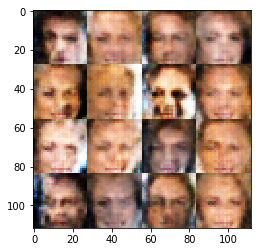

Epoch 0/1... Discriminator Loss: 1.6458... Generator Loss: 0.8284
Epoch 0/1... Discriminator Loss: 1.3634... Generator Loss: 0.8360
Epoch 0/1... Discriminator Loss: 1.3419... Generator Loss: 0.9545
Epoch 0/1... Discriminator Loss: 1.3787... Generator Loss: 0.8233
Epoch 0/1... Discriminator Loss: 1.4514... Generator Loss: 0.8404


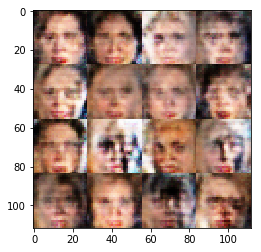

Epoch 0/1... Discriminator Loss: 1.4155... Generator Loss: 0.7180
Epoch 0/1... Discriminator Loss: 1.2714... Generator Loss: 0.9924
Epoch 0/1... Discriminator Loss: 1.5038... Generator Loss: 0.8352
Epoch 0/1... Discriminator Loss: 1.4436... Generator Loss: 0.8422
Epoch 0/1... Discriminator Loss: 1.3815... Generator Loss: 0.8326


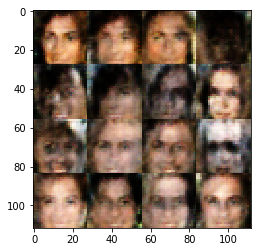

Epoch 0/1... Discriminator Loss: 1.3475... Generator Loss: 0.7069
Epoch 0/1... Discriminator Loss: 1.3296... Generator Loss: 0.8634
Epoch 0/1... Discriminator Loss: 1.4465... Generator Loss: 0.8284
Epoch 0/1... Discriminator Loss: 1.5173... Generator Loss: 0.8570
Epoch 0/1... Discriminator Loss: 1.4421... Generator Loss: 0.6833


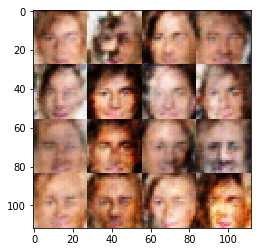

Epoch 0/1... Discriminator Loss: 1.4459... Generator Loss: 0.9236
Epoch 0/1... Discriminator Loss: 1.3618... Generator Loss: 0.8025
Epoch 0/1... Discriminator Loss: 1.3546... Generator Loss: 0.8036
Epoch 0/1... Discriminator Loss: 1.3394... Generator Loss: 0.9933
Epoch 0/1... Discriminator Loss: 1.3315... Generator Loss: 1.0126


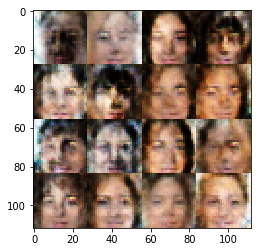

Epoch 0/1... Discriminator Loss: 1.2941... Generator Loss: 0.8973
Epoch 0/1... Discriminator Loss: 1.3770... Generator Loss: 0.8024
Epoch 0/1... Discriminator Loss: 1.3945... Generator Loss: 0.7627
Epoch 0/1... Discriminator Loss: 1.3667... Generator Loss: 0.8148
Epoch 0/1... Discriminator Loss: 1.2780... Generator Loss: 0.9481


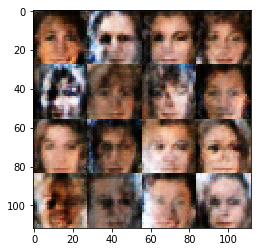

Epoch 0/1... Discriminator Loss: 1.4848... Generator Loss: 0.7836
Epoch 0/1... Discriminator Loss: 1.4254... Generator Loss: 0.8726
Epoch 0/1... Discriminator Loss: 1.3625... Generator Loss: 0.8214
Epoch 0/1... Discriminator Loss: 1.3510... Generator Loss: 0.8813
Epoch 0/1... Discriminator Loss: 1.3695... Generator Loss: 0.8744


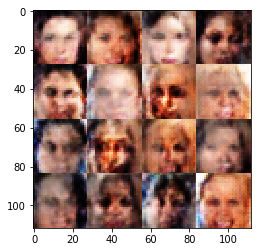

Epoch 0/1... Discriminator Loss: 1.4079... Generator Loss: 0.8101
Epoch 0/1... Discriminator Loss: 1.3350... Generator Loss: 0.8336
Epoch 0/1... Discriminator Loss: 1.3183... Generator Loss: 1.0043
Epoch 0/1... Discriminator Loss: 1.3840... Generator Loss: 0.8087
Epoch 0/1... Discriminator Loss: 1.3558... Generator Loss: 0.8279


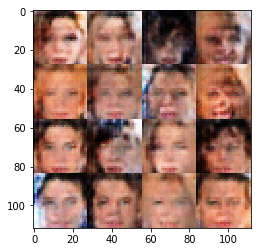

Epoch 0/1... Discriminator Loss: 1.3840... Generator Loss: 0.8209
Epoch 0/1... Discriminator Loss: 1.3214... Generator Loss: 0.9670
Epoch 0/1... Discriminator Loss: 1.3700... Generator Loss: 0.8053
Epoch 0/1... Discriminator Loss: 1.3118... Generator Loss: 0.7996
Epoch 0/1... Discriminator Loss: 1.3984... Generator Loss: 0.8418


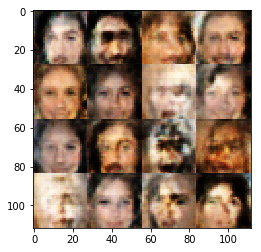

Epoch 0/1... Discriminator Loss: 1.3859... Generator Loss: 0.8869
Epoch 0/1... Discriminator Loss: 1.4663... Generator Loss: 0.8124
Epoch 0/1... Discriminator Loss: 1.3338... Generator Loss: 0.8666
Epoch 0/1... Discriminator Loss: 1.4619... Generator Loss: 0.8057
Epoch 0/1... Discriminator Loss: 1.3442... Generator Loss: 0.9478


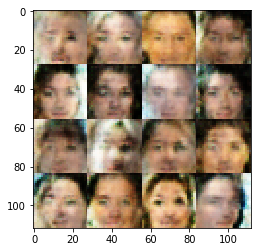

Epoch 0/1... Discriminator Loss: 1.4109... Generator Loss: 0.8696
Epoch 0/1... Discriminator Loss: 1.3834... Generator Loss: 0.7973
Epoch 0/1... Discriminator Loss: 1.3101... Generator Loss: 0.8071
Epoch 0/1... Discriminator Loss: 1.3853... Generator Loss: 0.8405
Epoch 0/1... Discriminator Loss: 1.4044... Generator Loss: 0.8519


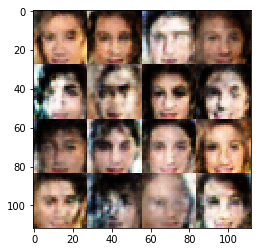

Epoch 0/1... Discriminator Loss: 1.3338... Generator Loss: 0.8694
Epoch 0/1... Discriminator Loss: 1.4123... Generator Loss: 0.8073
Epoch 0/1... Discriminator Loss: 1.5102... Generator Loss: 0.8265
Epoch 0/1... Discriminator Loss: 1.3494... Generator Loss: 0.7818
Epoch 0/1... Discriminator Loss: 1.4791... Generator Loss: 0.9191


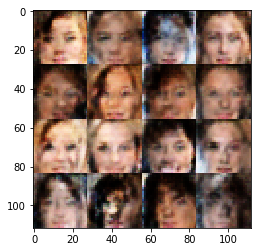

Epoch 0/1... Discriminator Loss: 1.4674... Generator Loss: 0.9158
Epoch 0/1... Discriminator Loss: 1.3728... Generator Loss: 0.8766
Epoch 0/1... Discriminator Loss: 1.3551... Generator Loss: 0.8452
Epoch 0/1... Discriminator Loss: 1.3754... Generator Loss: 0.9181
Epoch 0/1... Discriminator Loss: 1.4134... Generator Loss: 0.9670


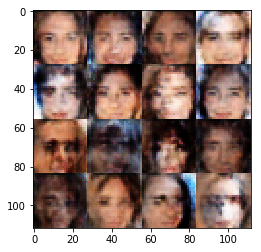

Epoch 0/1... Discriminator Loss: 1.3535... Generator Loss: 0.8695
Epoch 0/1... Discriminator Loss: 1.3629... Generator Loss: 0.8786
Epoch 0/1... Discriminator Loss: 1.4411... Generator Loss: 0.7604
Epoch 0/1... Discriminator Loss: 1.4496... Generator Loss: 0.8703
Epoch 0/1... Discriminator Loss: 1.3935... Generator Loss: 0.8385


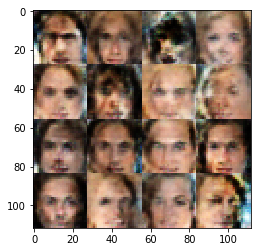

Epoch 0/1... Discriminator Loss: 1.3272... Generator Loss: 0.8584
Epoch 0/1... Discriminator Loss: 1.3299... Generator Loss: 0.9966
Epoch 0/1... Discriminator Loss: 1.3420... Generator Loss: 0.9374
Epoch 0/1... Discriminator Loss: 1.4206... Generator Loss: 0.8906
Epoch 0/1... Discriminator Loss: 1.2722... Generator Loss: 0.8475


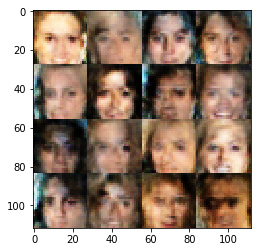

Epoch 0/1... Discriminator Loss: 1.4435... Generator Loss: 0.8037
Epoch 0/1... Discriminator Loss: 1.3614... Generator Loss: 0.9203
Epoch 0/1... Discriminator Loss: 1.4511... Generator Loss: 0.7760
Epoch 0/1... Discriminator Loss: 1.3436... Generator Loss: 0.8996
Epoch 0/1... Discriminator Loss: 1.3184... Generator Loss: 0.9343


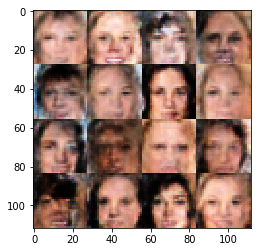

Epoch 0/1... Discriminator Loss: 1.3382... Generator Loss: 0.8430
Epoch 0/1... Discriminator Loss: 1.3318... Generator Loss: 0.8941
Epoch 0/1... Discriminator Loss: 1.3578... Generator Loss: 0.8402
Epoch 0/1... Discriminator Loss: 1.3423... Generator Loss: 0.8315
Epoch 0/1... Discriminator Loss: 1.4817... Generator Loss: 0.8589


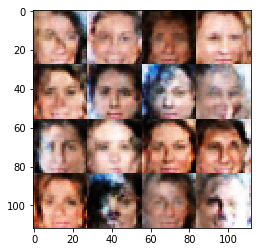

Epoch 0/1... Discriminator Loss: 1.3639... Generator Loss: 0.9043
Epoch 0/1... Discriminator Loss: 1.3253... Generator Loss: 0.8675
Epoch 0/1... Discriminator Loss: 1.4558... Generator Loss: 0.7867
Epoch 0/1... Discriminator Loss: 1.5027... Generator Loss: 0.7990
Epoch 0/1... Discriminator Loss: 1.3384... Generator Loss: 0.7682


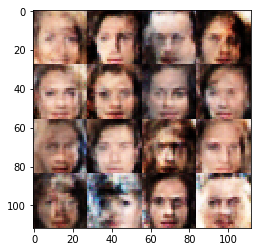

Epoch 0/1... Discriminator Loss: 1.3622... Generator Loss: 0.8198
Epoch 0/1... Discriminator Loss: 1.3288... Generator Loss: 0.9601
Epoch 0/1... Discriminator Loss: 1.3467... Generator Loss: 0.8830
Epoch 0/1... Discriminator Loss: 1.3894... Generator Loss: 0.8366
Epoch 0/1... Discriminator Loss: 1.3740... Generator Loss: 0.9179


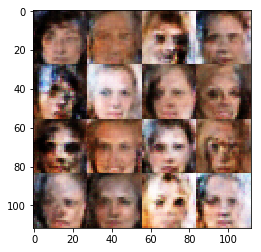

Epoch 0/1... Discriminator Loss: 1.4748... Generator Loss: 0.7313
Epoch 0/1... Discriminator Loss: 1.4246... Generator Loss: 0.8783
Epoch 0/1... Discriminator Loss: 1.4332... Generator Loss: 0.9666
Epoch 0/1... Discriminator Loss: 1.3614... Generator Loss: 0.8382
Epoch 0/1... Discriminator Loss: 1.3309... Generator Loss: 0.9061


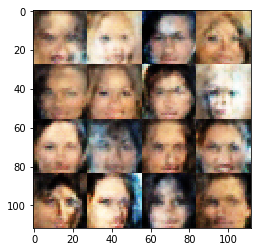

Epoch 0/1... Discriminator Loss: 1.4463... Generator Loss: 0.8962
Epoch 0/1... Discriminator Loss: 1.4074... Generator Loss: 0.9075
Epoch 0/1... Discriminator Loss: 1.3808... Generator Loss: 0.9088
Epoch 0/1... Discriminator Loss: 1.5646... Generator Loss: 0.7969
Epoch 0/1... Discriminator Loss: 1.4673... Generator Loss: 0.9059


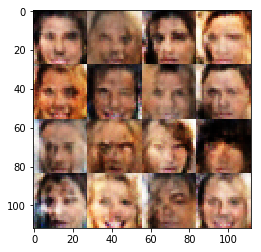

Epoch 0/1... Discriminator Loss: 1.4432... Generator Loss: 0.9124
Epoch 0/1... Discriminator Loss: 1.3201... Generator Loss: 0.8821
Epoch 0/1... Discriminator Loss: 1.3578... Generator Loss: 0.8325
Epoch 0/1... Discriminator Loss: 1.2400... Generator Loss: 0.9091
Epoch 0/1... Discriminator Loss: 1.3432... Generator Loss: 0.8337


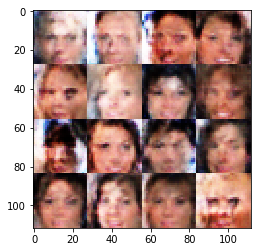

Epoch 0/1... Discriminator Loss: 1.4350... Generator Loss: 0.8186
Epoch 0/1... Discriminator Loss: 1.3722... Generator Loss: 0.9363
Epoch 0/1... Discriminator Loss: 1.2820... Generator Loss: 0.8516
Epoch 0/1... Discriminator Loss: 1.2910... Generator Loss: 0.8364
Epoch 0/1... Discriminator Loss: 1.4005... Generator Loss: 0.8113


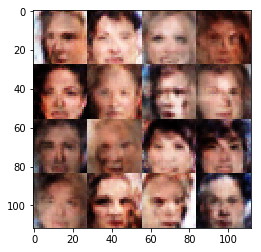

Epoch 0/1... Discriminator Loss: 1.3786... Generator Loss: 0.8477
Epoch 0/1... Discriminator Loss: 1.3164... Generator Loss: 0.9937
Epoch 0/1... Discriminator Loss: 1.3972... Generator Loss: 0.9432
Epoch 0/1... Discriminator Loss: 1.3849... Generator Loss: 0.8842
Epoch 0/1... Discriminator Loss: 1.4371... Generator Loss: 0.8097


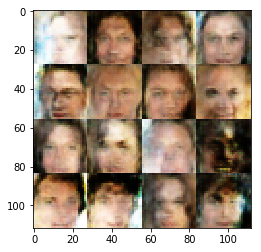

Epoch 0/1... Discriminator Loss: 1.2843... Generator Loss: 0.8850
Epoch 0/1... Discriminator Loss: 1.2856... Generator Loss: 0.8961
Epoch 0/1... Discriminator Loss: 1.4082... Generator Loss: 0.8582
Epoch 0/1... Discriminator Loss: 1.3975... Generator Loss: 0.9293
Epoch 0/1... Discriminator Loss: 1.4236... Generator Loss: 0.9126


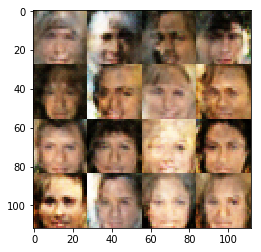

Epoch 0/1... Discriminator Loss: 1.3660... Generator Loss: 0.8291
Epoch 0/1... Discriminator Loss: 1.4142... Generator Loss: 0.9197
Epoch 0/1... Discriminator Loss: 1.3667... Generator Loss: 0.9178
Epoch 0/1... Discriminator Loss: 1.4258... Generator Loss: 0.8308
Epoch 0/1... Discriminator Loss: 1.3079... Generator Loss: 0.9241


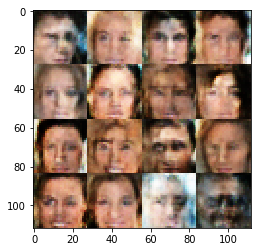

Epoch 0/1... Discriminator Loss: 1.4813... Generator Loss: 0.8154
Epoch 0/1... Discriminator Loss: 1.4229... Generator Loss: 0.8560
Epoch 0/1... Discriminator Loss: 1.4585... Generator Loss: 0.8318
Epoch 0/1... Discriminator Loss: 1.3825... Generator Loss: 0.7975
Epoch 0/1... Discriminator Loss: 1.3148... Generator Loss: 0.8656


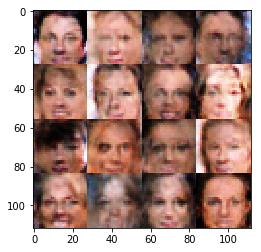

Epoch 0/1... Discriminator Loss: 1.4230... Generator Loss: 0.8542
Epoch 0/1... Discriminator Loss: 1.3421... Generator Loss: 0.8113
Epoch 0/1... Discriminator Loss: 1.3932... Generator Loss: 0.8577
Epoch 0/1... Discriminator Loss: 1.3561... Generator Loss: 0.8053
Epoch 0/1... Discriminator Loss: 1.3819... Generator Loss: 0.8688


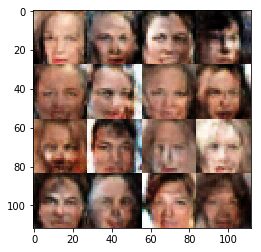

Epoch 0/1... Discriminator Loss: 1.3650... Generator Loss: 0.9157
Epoch 0/1... Discriminator Loss: 1.3731... Generator Loss: 0.8953
Epoch 0/1... Discriminator Loss: 1.2882... Generator Loss: 0.8685
Epoch 0/1... Discriminator Loss: 1.3227... Generator Loss: 0.8341
Epoch 0/1... Discriminator Loss: 1.4859... Generator Loss: 0.8173


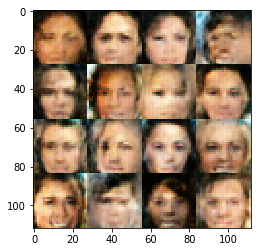

Epoch 0/1... Discriminator Loss: 1.4536... Generator Loss: 0.9274
Epoch 0/1... Discriminator Loss: 1.3774... Generator Loss: 0.8392
Epoch 0/1... Discriminator Loss: 1.3710... Generator Loss: 0.9551
Epoch 0/1... Discriminator Loss: 1.2992... Generator Loss: 0.8229
Epoch 0/1... Discriminator Loss: 1.4045... Generator Loss: 0.8328


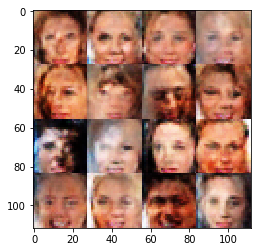

Epoch 0/1... Discriminator Loss: 1.2338... Generator Loss: 0.9154
Epoch 0/1... Discriminator Loss: 1.3317... Generator Loss: 0.7369
Epoch 0/1... Discriminator Loss: 1.2541... Generator Loss: 0.9301
Epoch 0/1... Discriminator Loss: 1.3753... Generator Loss: 0.7054
Epoch 0/1... Discriminator Loss: 1.3907... Generator Loss: 0.9512


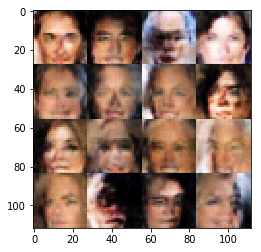

Epoch 0/1... Discriminator Loss: 1.4250... Generator Loss: 0.7386
Epoch 0/1... Discriminator Loss: 1.4638... Generator Loss: 0.8825
Epoch 0/1... Discriminator Loss: 1.4151... Generator Loss: 0.8632
Epoch 0/1... Discriminator Loss: 1.3592... Generator Loss: 0.7737
Epoch 0/1... Discriminator Loss: 1.3522... Generator Loss: 0.8381


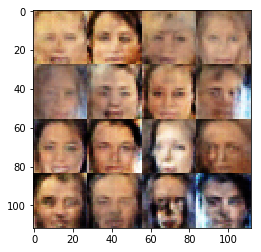

Epoch 0/1... Discriminator Loss: 1.2569... Generator Loss: 0.9036
Epoch 0/1... Discriminator Loss: 1.3959... Generator Loss: 0.8431
Epoch 0/1... Discriminator Loss: 1.3748... Generator Loss: 0.9069
Epoch 0/1... Discriminator Loss: 1.3537... Generator Loss: 0.8534
Epoch 0/1... Discriminator Loss: 1.4035... Generator Loss: 0.8815


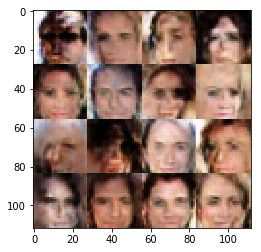

Epoch 0/1... Discriminator Loss: 1.3834... Generator Loss: 0.8615
Epoch 0/1... Discriminator Loss: 1.2593... Generator Loss: 0.9254
Epoch 0/1... Discriminator Loss: 1.4111... Generator Loss: 0.8609
Epoch 0/1... Discriminator Loss: 1.3510... Generator Loss: 0.7901
Epoch 0/1... Discriminator Loss: 1.3707... Generator Loss: 0.8075


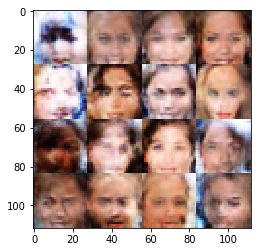

Epoch 0/1... Discriminator Loss: 1.4227... Generator Loss: 0.8192
Epoch 0/1... Discriminator Loss: 1.3057... Generator Loss: 0.7455
Epoch 0/1... Discriminator Loss: 1.2837... Generator Loss: 0.9092
Epoch 0/1... Discriminator Loss: 1.3817... Generator Loss: 0.8452
Epoch 0/1... Discriminator Loss: 1.3488... Generator Loss: 0.8543


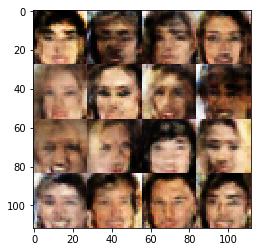

Epoch 0/1... Discriminator Loss: 1.2861... Generator Loss: 0.8598
Epoch 0/1... Discriminator Loss: 1.3301... Generator Loss: 0.7662
Epoch 0/1... Discriminator Loss: 1.4021... Generator Loss: 0.8774
Epoch 0/1... Discriminator Loss: 1.3185... Generator Loss: 0.8299
Epoch 0/1... Discriminator Loss: 1.4003... Generator Loss: 0.8068


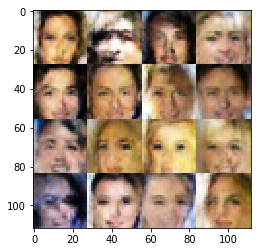

Epoch 0/1... Discriminator Loss: 1.3750... Generator Loss: 0.8430
Epoch 0/1... Discriminator Loss: 1.3625... Generator Loss: 0.8416
Epoch 0/1... Discriminator Loss: 1.3420... Generator Loss: 0.8368
Epoch 0/1... Discriminator Loss: 1.3178... Generator Loss: 0.7428
Epoch 0/1... Discriminator Loss: 1.3823... Generator Loss: 0.8718


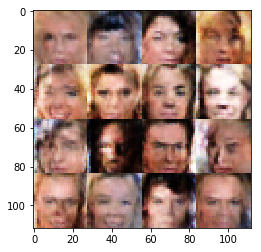

Epoch 0/1... Discriminator Loss: 1.3686... Generator Loss: 0.8628
Epoch 0/1... Discriminator Loss: 1.4201... Generator Loss: 0.7867
Epoch 0/1... Discriminator Loss: 1.3303... Generator Loss: 0.8590
Epoch 0/1... Discriminator Loss: 1.3043... Generator Loss: 0.8548
Epoch 0/1... Discriminator Loss: 1.4188... Generator Loss: 0.7810


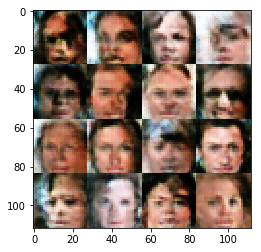

Epoch 0/1... Discriminator Loss: 1.3959... Generator Loss: 0.9120
Epoch 0/1... Discriminator Loss: 1.4090... Generator Loss: 0.7580
Epoch 0/1... Discriminator Loss: 1.4539... Generator Loss: 0.8201
Epoch 0/1... Discriminator Loss: 1.3929... Generator Loss: 0.8777
Epoch 0/1... Discriminator Loss: 1.4522... Generator Loss: 0.8436


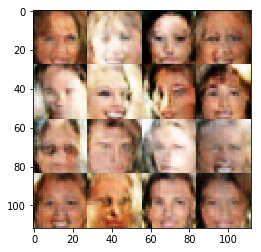

Epoch 0/1... Discriminator Loss: 1.4653... Generator Loss: 0.8562
Epoch 0/1... Discriminator Loss: 1.3568... Generator Loss: 0.8753
Epoch 0/1... Discriminator Loss: 1.3086... Generator Loss: 0.7985
Epoch 0/1... Discriminator Loss: 1.3500... Generator Loss: 0.8954
Epoch 0/1... Discriminator Loss: 1.2821... Generator Loss: 0.8364


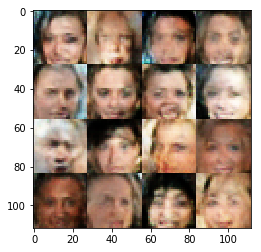

Epoch 0/1... Discriminator Loss: 1.4089... Generator Loss: 0.8329
Epoch 0/1... Discriminator Loss: 1.3905... Generator Loss: 0.8207
Epoch 0/1... Discriminator Loss: 1.3284... Generator Loss: 0.9033
Epoch 0/1... Discriminator Loss: 1.4378... Generator Loss: 0.7200
Epoch 0/1... Discriminator Loss: 1.3738... Generator Loss: 0.8159


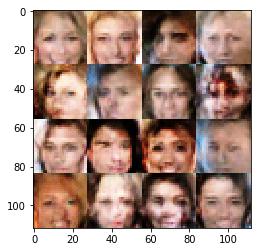

Epoch 0/1... Discriminator Loss: 1.3612... Generator Loss: 0.8836
Epoch 0/1... Discriminator Loss: 1.4170... Generator Loss: 0.7943
Epoch 0/1... Discriminator Loss: 1.3806... Generator Loss: 0.9077
Epoch 0/1... Discriminator Loss: 1.3759... Generator Loss: 0.9478
Epoch 0/1... Discriminator Loss: 1.3233... Generator Loss: 0.8635


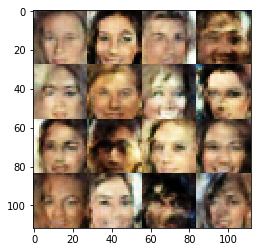

Epoch 0/1... Discriminator Loss: 1.3365... Generator Loss: 0.7888
Epoch 0/1... Discriminator Loss: 1.4169... Generator Loss: 0.8460
Epoch 0/1... Discriminator Loss: 1.3202... Generator Loss: 0.8142
Epoch 0/1... Discriminator Loss: 1.2793... Generator Loss: 0.8238
Epoch 0/1... Discriminator Loss: 1.4770... Generator Loss: 0.7901


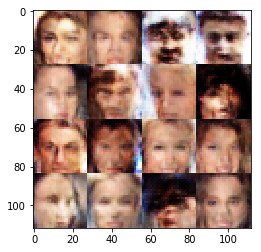

Epoch 0/1... Discriminator Loss: 1.2593... Generator Loss: 0.9544
Epoch 0/1... Discriminator Loss: 1.4586... Generator Loss: 0.7172
Epoch 0/1... Discriminator Loss: 1.3669... Generator Loss: 0.8297
Epoch 0/1... Discriminator Loss: 1.3358... Generator Loss: 0.9459
Epoch 0/1... Discriminator Loss: 1.2790... Generator Loss: 0.8245


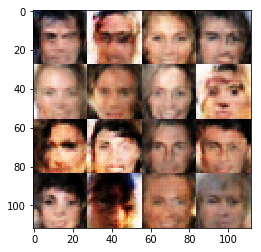

Epoch 0/1... Discriminator Loss: 1.4952... Generator Loss: 0.8319
Epoch 0/1... Discriminator Loss: 1.3791... Generator Loss: 0.7990
Epoch 0/1... Discriminator Loss: 1.3965... Generator Loss: 0.7424
Epoch 0/1... Discriminator Loss: 1.3137... Generator Loss: 0.8748
Epoch 0/1... Discriminator Loss: 1.3660... Generator Loss: 0.8971


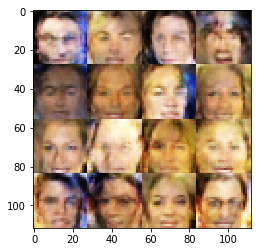

Epoch 0/1... Discriminator Loss: 1.3672... Generator Loss: 0.7718
Epoch 0/1... Discriminator Loss: 1.3010... Generator Loss: 0.8334
Epoch 0/1... Discriminator Loss: 1.2797... Generator Loss: 0.8150
Epoch 0/1... Discriminator Loss: 1.4113... Generator Loss: 0.8347
Epoch 0/1... Discriminator Loss: 1.2627... Generator Loss: 0.9404


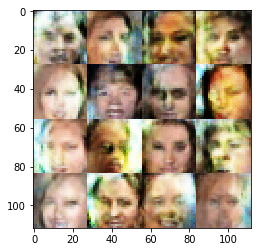

Epoch 0/1... Discriminator Loss: 1.4105... Generator Loss: 0.9016
Epoch 0/1... Discriminator Loss: 1.3478... Generator Loss: 0.8610
Epoch 0/1... Discriminator Loss: 1.3829... Generator Loss: 0.8571
Epoch 0/1... Discriminator Loss: 1.3714... Generator Loss: 0.8092
Epoch 0/1... Discriminator Loss: 1.2360... Generator Loss: 0.8575


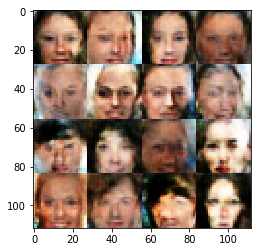

Epoch 0/1... Discriminator Loss: 1.2882... Generator Loss: 0.8318
Epoch 0/1... Discriminator Loss: 1.5090... Generator Loss: 0.7990
Epoch 0/1... Discriminator Loss: 1.2812... Generator Loss: 0.9237
Epoch 0/1... Discriminator Loss: 1.4305... Generator Loss: 0.8340
Epoch 0/1... Discriminator Loss: 1.3398... Generator Loss: 0.8426


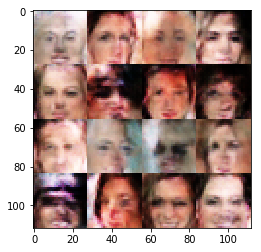

Epoch 0/1... Discriminator Loss: 1.3817... Generator Loss: 0.7811
Epoch 0/1... Discriminator Loss: 1.4507... Generator Loss: 0.7944
Epoch 0/1... Discriminator Loss: 1.4439... Generator Loss: 0.9082
Epoch 0/1... Discriminator Loss: 1.4065... Generator Loss: 0.9225
Epoch 0/1... Discriminator Loss: 1.4673... Generator Loss: 0.7199


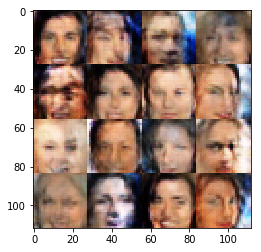

Epoch 0/1... Discriminator Loss: 1.3377... Generator Loss: 0.9017
Epoch 0/1... Discriminator Loss: 1.3264... Generator Loss: 0.8524
Epoch 0/1... Discriminator Loss: 1.3880... Generator Loss: 0.7862
Epoch 0/1... Discriminator Loss: 1.3276... Generator Loss: 0.8381
Epoch 0/1... Discriminator Loss: 1.3097... Generator Loss: 0.8836


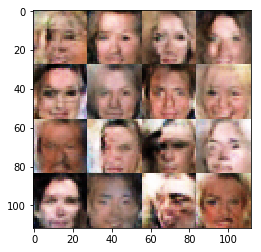

Epoch 0/1... Discriminator Loss: 1.4321... Generator Loss: 0.7937
Epoch 0/1... Discriminator Loss: 1.3743... Generator Loss: 0.8436
Epoch 0/1... Discriminator Loss: 1.2898... Generator Loss: 0.9221
Epoch 0/1... Discriminator Loss: 1.3624... Generator Loss: 0.8748
Epoch 0/1... Discriminator Loss: 1.3976... Generator Loss: 0.8544


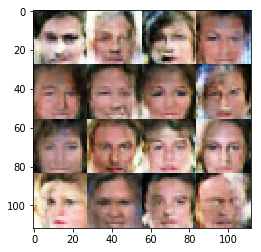

Epoch 0/1... Discriminator Loss: 1.2842... Generator Loss: 0.8859
Epoch 0/1... Discriminator Loss: 1.3411... Generator Loss: 0.9160
Epoch 0/1... Discriminator Loss: 1.3976... Generator Loss: 0.9235
Epoch 0/1... Discriminator Loss: 1.4480... Generator Loss: 0.8592
Epoch 0/1... Discriminator Loss: 1.3150... Generator Loss: 0.7376


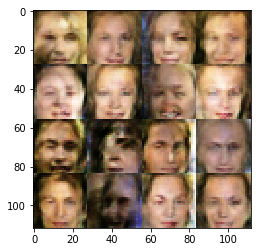

Epoch 0/1... Discriminator Loss: 1.3158... Generator Loss: 0.8912
Epoch 0/1... Discriminator Loss: 1.3685... Generator Loss: 0.8697
Epoch 0/1... Discriminator Loss: 1.3693... Generator Loss: 0.7347
Epoch 0/1... Discriminator Loss: 1.3568... Generator Loss: 0.9096
Epoch 0/1... Discriminator Loss: 1.2364... Generator Loss: 0.8208


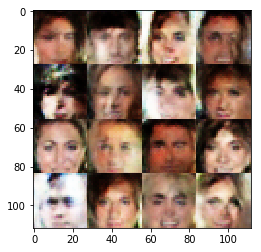

Epoch 0/1... Discriminator Loss: 1.3906... Generator Loss: 0.9092
Epoch 0/1... Discriminator Loss: 1.2515... Generator Loss: 0.9326
Epoch 0/1... Discriminator Loss: 1.3187... Generator Loss: 0.8366
Epoch 0/1... Discriminator Loss: 1.3278... Generator Loss: 0.8905
Epoch 0/1... Discriminator Loss: 1.4434... Generator Loss: 0.7276


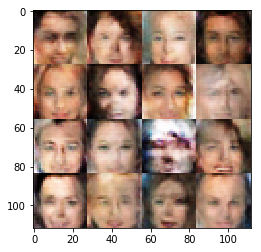

Epoch 0/1... Discriminator Loss: 1.2880... Generator Loss: 0.8645
Epoch 0/1... Discriminator Loss: 1.3387... Generator Loss: 0.9024
Epoch 0/1... Discriminator Loss: 1.4534... Generator Loss: 0.7723
Epoch 0/1... Discriminator Loss: 1.4033... Generator Loss: 0.8820
Epoch 0/1... Discriminator Loss: 1.2985... Generator Loss: 0.8987


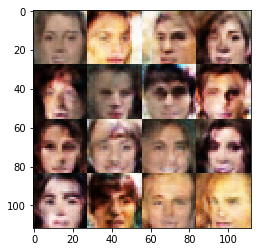

Epoch 0/1... Discriminator Loss: 1.2530... Generator Loss: 0.8632
Epoch 0/1... Discriminator Loss: 1.3635... Generator Loss: 0.8805
Epoch 0/1... Discriminator Loss: 1.3769... Generator Loss: 0.8063
Epoch 0/1... Discriminator Loss: 1.3705... Generator Loss: 0.8506
Epoch 0/1... Discriminator Loss: 1.4291... Generator Loss: 0.8044


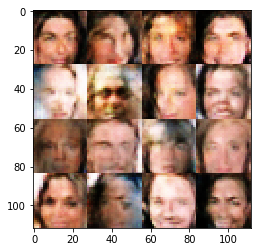

Epoch 0/1... Discriminator Loss: 1.3981... Generator Loss: 0.8076
Epoch 0/1... Discriminator Loss: 1.4233... Generator Loss: 0.8055
Epoch 0/1... Discriminator Loss: 1.3443... Generator Loss: 0.8452
Epoch 0/1... Discriminator Loss: 1.3213... Generator Loss: 0.8102
Epoch 0/1... Discriminator Loss: 1.4302... Generator Loss: 0.9052


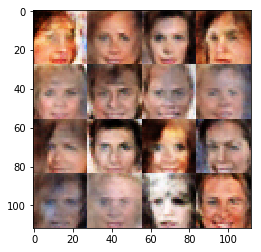

Epoch 0/1... Discriminator Loss: 1.3196... Generator Loss: 0.8510
Epoch 0/1... Discriminator Loss: 1.3460... Generator Loss: 0.8450
Epoch 0/1... Discriminator Loss: 1.3456... Generator Loss: 0.8559
Epoch 0/1... Discriminator Loss: 1.4016... Generator Loss: 0.8577
Epoch 0/1... Discriminator Loss: 1.3359... Generator Loss: 0.8352


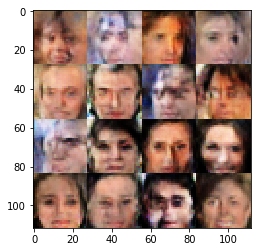

Epoch 0/1... Discriminator Loss: 1.3882... Generator Loss: 0.8429
Epoch 0/1... Discriminator Loss: 1.3311... Generator Loss: 0.8992
Epoch 0/1... Discriminator Loss: 1.3696... Generator Loss: 0.9021
Epoch 0/1... Discriminator Loss: 1.3554... Generator Loss: 0.9623
Epoch 0/1... Discriminator Loss: 1.2738... Generator Loss: 0.9849


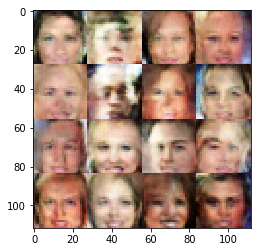

Epoch 0/1... Discriminator Loss: 1.3817... Generator Loss: 1.0117
Epoch 0/1... Discriminator Loss: 1.3179... Generator Loss: 0.8680
Epoch 0/1... Discriminator Loss: 1.4351... Generator Loss: 0.7638
Epoch 0/1... Discriminator Loss: 1.3480... Generator Loss: 0.7955
Epoch 0/1... Discriminator Loss: 1.3421... Generator Loss: 0.8767


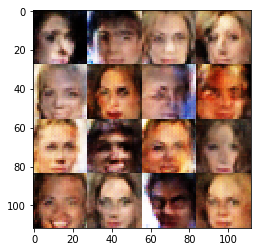

Epoch 0/1... Discriminator Loss: 1.3014... Generator Loss: 0.8082
Epoch 0/1... Discriminator Loss: 1.2948... Generator Loss: 0.8730
Epoch 0/1... Discriminator Loss: 1.4172... Generator Loss: 0.8366
Epoch 0/1... Discriminator Loss: 1.4237... Generator Loss: 0.8570
Epoch 0/1... Discriminator Loss: 1.3560... Generator Loss: 0.8588


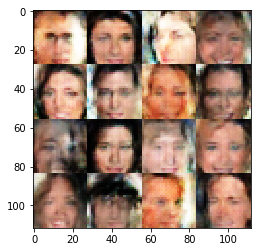

Epoch 0/1... Discriminator Loss: 1.3463... Generator Loss: 0.8030
Epoch 0/1... Discriminator Loss: 1.3257... Generator Loss: 0.8023
Epoch 0/1... Discriminator Loss: 1.3450... Generator Loss: 0.7919
Epoch 0/1... Discriminator Loss: 1.4071... Generator Loss: 0.9132
Epoch 0/1... Discriminator Loss: 1.2703... Generator Loss: 0.8459


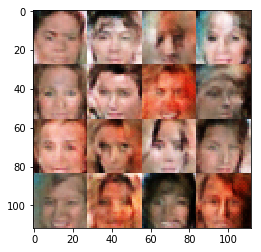

Epoch 0/1... Discriminator Loss: 1.4197... Generator Loss: 0.9082
Epoch 0/1... Discriminator Loss: 1.4273... Generator Loss: 0.8274
Epoch 0/1... Discriminator Loss: 1.2698... Generator Loss: 0.7926
Epoch 0/1... Discriminator Loss: 1.3398... Generator Loss: 0.8451
Epoch 0/1... Discriminator Loss: 1.2833... Generator Loss: 0.8897


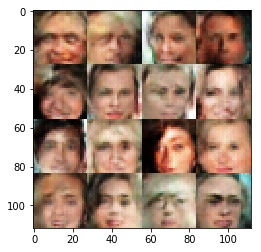

Epoch 0/1... Discriminator Loss: 1.3795... Generator Loss: 0.9179
Epoch 0/1... Discriminator Loss: 1.3352... Generator Loss: 0.9170
Epoch 0/1... Discriminator Loss: 1.3668... Generator Loss: 0.8177
Epoch 0/1... Discriminator Loss: 1.3601... Generator Loss: 0.8793
Epoch 0/1... Discriminator Loss: 1.3479... Generator Loss: 0.8938


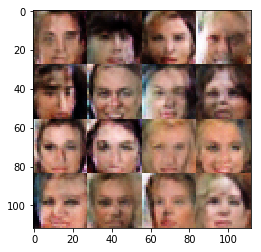

Epoch 0/1... Discriminator Loss: 1.2204... Generator Loss: 0.8926
Epoch 0/1... Discriminator Loss: 1.3975... Generator Loss: 0.9017
Epoch 0/1... Discriminator Loss: 1.2912... Generator Loss: 0.8291
Epoch 0/1... Discriminator Loss: 1.3321... Generator Loss: 0.8911
Epoch 0/1... Discriminator Loss: 1.3398... Generator Loss: 0.8935


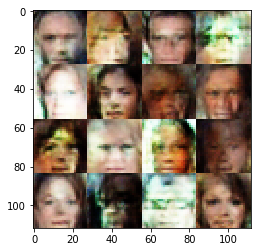

Epoch 0/1... Discriminator Loss: 1.3748... Generator Loss: 0.8897
Epoch 0/1... Discriminator Loss: 1.4056... Generator Loss: 0.9310
Epoch 0/1... Discriminator Loss: 1.3175... Generator Loss: 0.7487
Epoch 0/1... Discriminator Loss: 1.4454... Generator Loss: 0.7375
Epoch 0/1... Discriminator Loss: 1.2894... Generator Loss: 0.9585


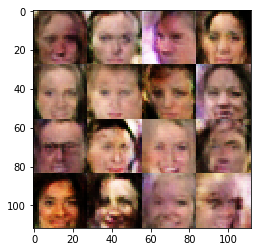

Epoch 0/1... Discriminator Loss: 1.3549... Generator Loss: 0.7749
Epoch 0/1... Discriminator Loss: 1.3723... Generator Loss: 0.8413
Epoch 0/1... Discriminator Loss: 1.3341... Generator Loss: 0.8163
Epoch 0/1... Discriminator Loss: 1.3417... Generator Loss: 0.8105
Epoch 0/1... Discriminator Loss: 1.3952... Generator Loss: 0.9087


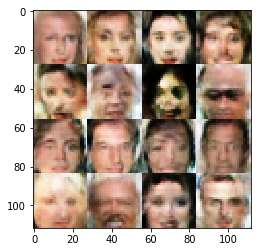

Epoch 0/1... Discriminator Loss: 1.3470... Generator Loss: 0.8119
Epoch 0/1... Discriminator Loss: 1.3454... Generator Loss: 0.9046
Epoch 0/1... Discriminator Loss: 1.2172... Generator Loss: 0.9886
Epoch 0/1... Discriminator Loss: 1.3812... Generator Loss: 0.8159
Epoch 0/1... Discriminator Loss: 1.4034... Generator Loss: 0.7776


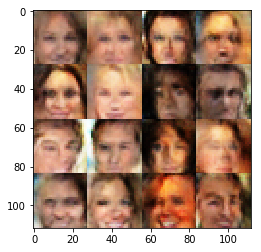

Epoch 0/1... Discriminator Loss: 1.3211... Generator Loss: 0.8981
Epoch 0/1... Discriminator Loss: 1.3643... Generator Loss: 0.8401
Epoch 0/1... Discriminator Loss: 1.3833... Generator Loss: 0.8636
Epoch 0/1... Discriminator Loss: 1.3956... Generator Loss: 0.8721
Epoch 0/1... Discriminator Loss: 1.2524... Generator Loss: 0.9165


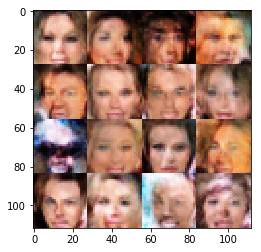

Epoch 0/1... Discriminator Loss: 1.3464... Generator Loss: 0.7663
Epoch 0/1... Discriminator Loss: 1.3121... Generator Loss: 0.8276
Epoch 0/1... Discriminator Loss: 1.3805... Generator Loss: 0.9289
Epoch 0/1... Discriminator Loss: 1.2779... Generator Loss: 0.8393
Epoch 0/1... Discriminator Loss: 1.4254... Generator Loss: 0.8605


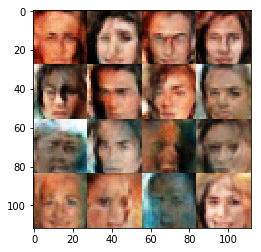

Epoch 0/1... Discriminator Loss: 1.3346... Generator Loss: 0.8461
Epoch 0/1... Discriminator Loss: 1.3042... Generator Loss: 0.8715
Epoch 0/1... Discriminator Loss: 1.3603... Generator Loss: 0.9231
Epoch 0/1... Discriminator Loss: 1.3597... Generator Loss: 0.7651
Epoch 0/1... Discriminator Loss: 1.3421... Generator Loss: 0.9535


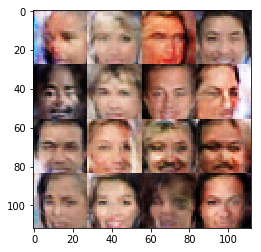

Epoch 0/1... Discriminator Loss: 1.2810... Generator Loss: 0.8173
Epoch 0/1... Discriminator Loss: 1.3529... Generator Loss: 0.8831
Epoch 0/1... Discriminator Loss: 1.3971... Generator Loss: 0.9141
Epoch 0/1... Discriminator Loss: 1.4242... Generator Loss: 0.8659
Epoch 0/1... Discriminator Loss: 1.4628... Generator Loss: 0.8555


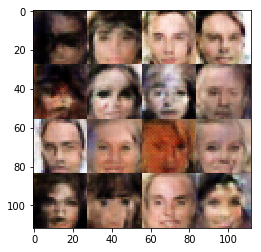

Epoch 0/1... Discriminator Loss: 1.3577... Generator Loss: 0.8237
Epoch 0/1... Discriminator Loss: 1.2201... Generator Loss: 1.0468
Epoch 0/1... Discriminator Loss: 1.3596... Generator Loss: 0.9243
Epoch 0/1... Discriminator Loss: 1.2583... Generator Loss: 0.8143
Epoch 0/1... Discriminator Loss: 1.3863... Generator Loss: 0.7842


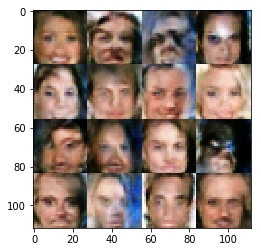

Epoch 0/1... Discriminator Loss: 1.3583... Generator Loss: 0.7614
Epoch 0/1... Discriminator Loss: 1.4060... Generator Loss: 0.7718
Epoch 0/1... Discriminator Loss: 1.2103... Generator Loss: 1.0105
Epoch 0/1... Discriminator Loss: 1.3251... Generator Loss: 0.8767
Epoch 0/1... Discriminator Loss: 1.3632... Generator Loss: 0.8079


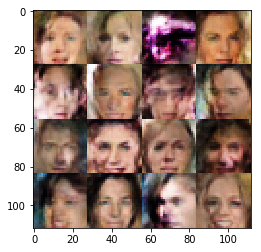

Epoch 0/1... Discriminator Loss: 1.2480... Generator Loss: 0.8721
Epoch 0/1... Discriminator Loss: 1.3295... Generator Loss: 0.9236
Epoch 0/1... Discriminator Loss: 1.4257... Generator Loss: 0.7155
Epoch 0/1... Discriminator Loss: 1.3532... Generator Loss: 0.8723
Epoch 0/1... Discriminator Loss: 1.3496... Generator Loss: 0.8514


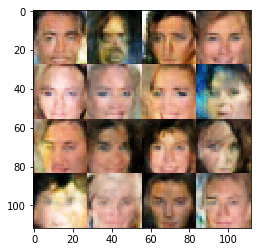

Epoch 0/1... Discriminator Loss: 1.3186... Generator Loss: 0.8211
Epoch 0/1... Discriminator Loss: 1.3901... Generator Loss: 0.9364
Epoch 0/1... Discriminator Loss: 1.4362... Generator Loss: 0.8356
Epoch 0/1... Discriminator Loss: 1.3625... Generator Loss: 0.8327
Epoch 0/1... Discriminator Loss: 1.3450... Generator Loss: 0.9573


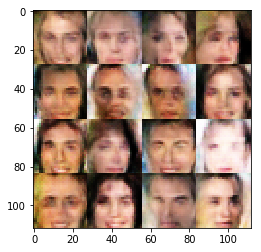

Epoch 0/1... Discriminator Loss: 1.3944... Generator Loss: 0.8026
Epoch 0/1... Discriminator Loss: 1.4130... Generator Loss: 0.8073
Epoch 0/1... Discriminator Loss: 1.3774... Generator Loss: 0.9134
Epoch 0/1... Discriminator Loss: 1.4062... Generator Loss: 0.7887
Epoch 0/1... Discriminator Loss: 1.2885... Generator Loss: 0.9049


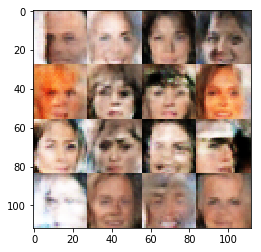

Epoch 0/1... Discriminator Loss: 1.3296... Generator Loss: 0.7648
Epoch 0/1... Discriminator Loss: 1.3665... Generator Loss: 0.8942
Epoch 0/1... Discriminator Loss: 1.3488... Generator Loss: 0.8966
Epoch 0/1... Discriminator Loss: 1.3606... Generator Loss: 0.7933
Epoch 0/1... Discriminator Loss: 1.2874... Generator Loss: 0.8364


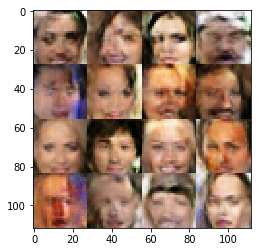

Epoch 0/1... Discriminator Loss: 1.4074... Generator Loss: 0.8306
Epoch 0/1... Discriminator Loss: 1.4176... Generator Loss: 0.8288
Epoch 0/1... Discriminator Loss: 1.3174... Generator Loss: 0.8238
Epoch 0/1... Discriminator Loss: 1.3129... Generator Loss: 0.7813
Epoch 0/1... Discriminator Loss: 1.3332... Generator Loss: 0.6973


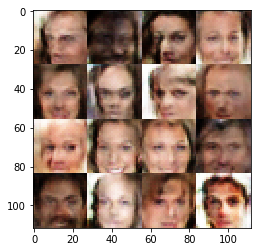

Epoch 0/1... Discriminator Loss: 1.3509... Generator Loss: 0.9071
Epoch 0/1... Discriminator Loss: 1.2815... Generator Loss: 0.8860
Epoch 0/1... Discriminator Loss: 1.3255... Generator Loss: 0.7740
Epoch 0/1... Discriminator Loss: 1.3710... Generator Loss: 0.7588
Epoch 0/1... Discriminator Loss: 1.4128... Generator Loss: 0.9149


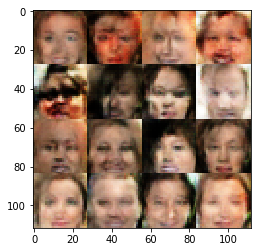

Epoch 0/1... Discriminator Loss: 1.3790... Generator Loss: 0.7844
Epoch 0/1... Discriminator Loss: 1.3510... Generator Loss: 0.8274
Epoch 0/1... Discriminator Loss: 1.3804... Generator Loss: 1.0333
Epoch 0/1... Discriminator Loss: 1.4009... Generator Loss: 0.9310
Epoch 0/1... Discriminator Loss: 1.3412... Generator Loss: 0.8173


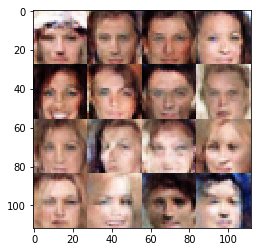

Epoch 0/1... Discriminator Loss: 1.3145... Generator Loss: 0.8762
Epoch 0/1... Discriminator Loss: 1.3095... Generator Loss: 0.9336
Epoch 0/1... Discriminator Loss: 1.3510... Generator Loss: 0.8529
Epoch 0/1... Discriminator Loss: 1.3125... Generator Loss: 0.9002
Epoch 0/1... Discriminator Loss: 1.3610... Generator Loss: 0.8136


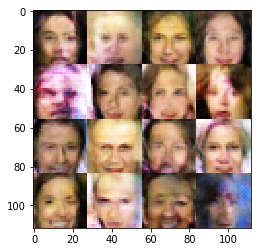

Epoch 0/1... Discriminator Loss: 1.3005... Generator Loss: 0.8952
Epoch 0/1... Discriminator Loss: 1.3708... Generator Loss: 0.8231
Epoch 0/1... Discriminator Loss: 1.2686... Generator Loss: 0.9294
Epoch 0/1... Discriminator Loss: 1.2802... Generator Loss: 0.8961
Epoch 0/1... Discriminator Loss: 1.3145... Generator Loss: 0.7937


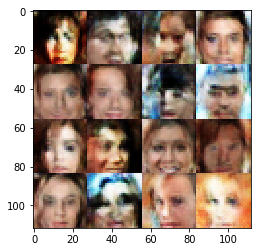

Epoch 0/1... Discriminator Loss: 1.3989... Generator Loss: 0.8492
Epoch 0/1... Discriminator Loss: 1.4455... Generator Loss: 0.9192
Epoch 0/1... Discriminator Loss: 1.5040... Generator Loss: 0.7401
Epoch 0/1... Discriminator Loss: 1.3573... Generator Loss: 0.8087
Epoch 0/1... Discriminator Loss: 1.3348... Generator Loss: 1.0016


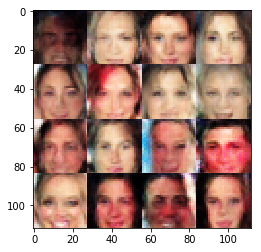

Epoch 0/1... Discriminator Loss: 1.3591... Generator Loss: 0.9366
Epoch 0/1... Discriminator Loss: 1.3220... Generator Loss: 0.9259
Epoch 0/1... Discriminator Loss: 1.3419... Generator Loss: 0.9107
Epoch 0/1... Discriminator Loss: 1.4306... Generator Loss: 0.7507
Epoch 0/1... Discriminator Loss: 1.3954... Generator Loss: 0.7911


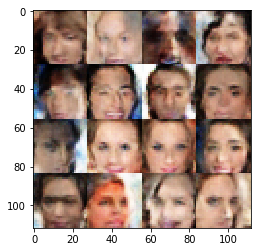

Epoch 0/1... Discriminator Loss: 1.4243... Generator Loss: 0.8145
Epoch 0/1... Discriminator Loss: 1.3527... Generator Loss: 0.8185
Epoch 0/1... Discriminator Loss: 1.2996... Generator Loss: 0.8037
Epoch 0/1... Discriminator Loss: 1.3969... Generator Loss: 0.8672
Epoch 0/1... Discriminator Loss: 1.3611... Generator Loss: 0.8908


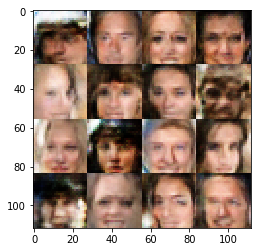

Epoch 0/1... Discriminator Loss: 1.3275... Generator Loss: 0.8632
Epoch 0/1... Discriminator Loss: 1.2899... Generator Loss: 0.9182
Epoch 0/1... Discriminator Loss: 1.3283... Generator Loss: 0.8958
Epoch 0/1... Discriminator Loss: 1.4152... Generator Loss: 0.7923
Epoch 0/1... Discriminator Loss: 1.3309... Generator Loss: 1.0203


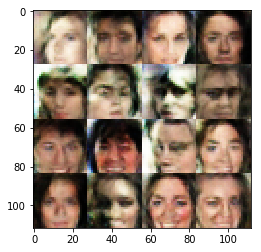

Epoch 0/1... Discriminator Loss: 1.3670... Generator Loss: 0.8105
Epoch 0/1... Discriminator Loss: 1.3075... Generator Loss: 0.8344
Epoch 0/1... Discriminator Loss: 1.3544... Generator Loss: 0.8050
Epoch 0/1... Discriminator Loss: 1.3038... Generator Loss: 0.9010
Epoch 0/1... Discriminator Loss: 1.4589... Generator Loss: 0.7554


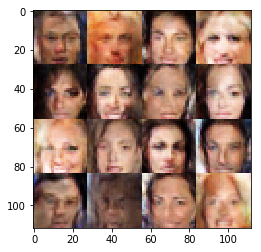

Epoch 0/1... Discriminator Loss: 1.3627... Generator Loss: 0.9423
Epoch 0/1... Discriminator Loss: 1.3268... Generator Loss: 0.8321
Epoch 0/1... Discriminator Loss: 1.3397... Generator Loss: 0.8939
Epoch 0/1... Discriminator Loss: 1.3096... Generator Loss: 0.8872
Epoch 0/1... Discriminator Loss: 1.2633... Generator Loss: 0.8994


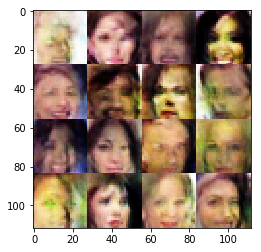

Epoch 0/1... Discriminator Loss: 1.3478... Generator Loss: 0.8255
Epoch 0/1... Discriminator Loss: 1.3364... Generator Loss: 0.9296
Epoch 0/1... Discriminator Loss: 1.3743... Generator Loss: 0.7786
Epoch 0/1... Discriminator Loss: 1.3161... Generator Loss: 0.7526
Epoch 0/1... Discriminator Loss: 1.3436... Generator Loss: 0.8698


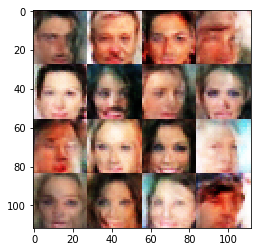

Epoch 0/1... Discriminator Loss: 1.3544... Generator Loss: 0.8996
Epoch 0/1... Discriminator Loss: 1.4146... Generator Loss: 0.8715
Epoch 0/1... Discriminator Loss: 1.3822... Generator Loss: 0.8237
Epoch 0/1... Discriminator Loss: 1.3524... Generator Loss: 0.7917
Epoch 0/1... Discriminator Loss: 1.3650... Generator Loss: 0.8039


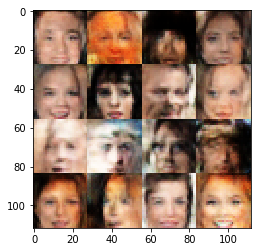

Epoch 0/1... Discriminator Loss: 1.3327... Generator Loss: 0.7823
Epoch 0/1... Discriminator Loss: 1.3583... Generator Loss: 0.9233
Epoch 0/1... Discriminator Loss: 1.3462... Generator Loss: 0.9225
Epoch 0/1... Discriminator Loss: 1.3737... Generator Loss: 0.9828
Epoch 0/1... Discriminator Loss: 1.3656... Generator Loss: 0.9266


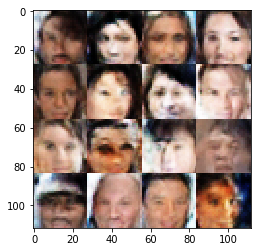

Epoch 0/1... Discriminator Loss: 1.3055... Generator Loss: 0.9851
Epoch 0/1... Discriminator Loss: 1.2840... Generator Loss: 0.8644
Epoch 0/1... Discriminator Loss: 1.3171... Generator Loss: 0.8706
Epoch 0/1... Discriminator Loss: 1.2720... Generator Loss: 0.8078
Epoch 0/1... Discriminator Loss: 1.2880... Generator Loss: 1.0079


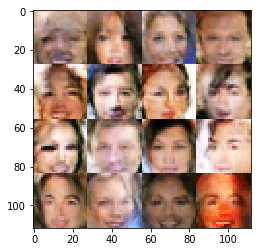

Epoch 0/1... Discriminator Loss: 1.3255... Generator Loss: 0.7174
Epoch 0/1... Discriminator Loss: 1.3154... Generator Loss: 0.8732
Epoch 0/1... Discriminator Loss: 1.3321... Generator Loss: 0.9217
Epoch 0/1... Discriminator Loss: 1.2477... Generator Loss: 0.8550
Epoch 0/1... Discriminator Loss: 1.3297... Generator Loss: 0.8592


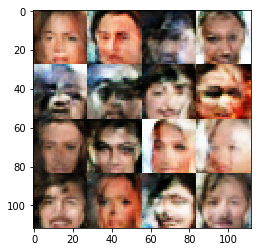

Epoch 0/1... Discriminator Loss: 1.3465... Generator Loss: 0.8910
Epoch 0/1... Discriminator Loss: 1.2764... Generator Loss: 0.9643
Epoch 0/1... Discriminator Loss: 1.3074... Generator Loss: 0.7757
Epoch 0/1... Discriminator Loss: 1.3742... Generator Loss: 0.8809


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.